## SOMPO Sƒ∞GORTA CASE STUDY √áALI≈ûMASI - Actuarial Data Scientist / Pricing Analyst pozisyonu
### RABƒ∞A ƒ∞NCƒ∞ ERYILMAZ

In [1580]:
# GEREKLƒ∞ K√úT√úPHANELER
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency # ki-kare testi i√ßin
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [1581]:
data=pd.read_csv("Case_Study_Data.xlsx - DATA.csv")
df=data.copy()
df.head()

TEKLƒ∞F NUMARASI HASARSIZLIK ƒ∞NDƒ∞Rƒ∞Mƒ∞ KADEMESƒ∞  TRAFƒ∞K BASAMAK KODU  \
0            15235                            0%                    7   
1            15236                           30%                    8   
2            15237                           30%                    6   
3            15238                           30%                    5   
4            15239                           30%                    7   

        MARKA  ARA√á YA≈ûI  MODEL YILI YAKIT Tƒ∞Pƒ∞        ƒ∞L        ƒ∞L√áE  YA≈û   \
0    MERCEDES          4        2020      DIZEL    ANKARA    KE√áƒ∞√ñREN    29   
1    MERCEDES          1        2023     BENZƒ∞N  ƒ∞STANBUL       TUZLA    41   
2        FORD          2        2022      DIZEL  ƒ∞STANBUL  SULTANGAZƒ∞    43   
3     RENAULT          1        2023      DIZEL     ƒ∞ZMƒ∞R         NaN     0   
4  VOLKSWAGEN          1        2023     BENZƒ∞N    ANKARA     √áANKAYA    43   

   TEKLƒ∞F PRƒ∞Mƒ∞ PORTF√ñY AYRIMI Sƒ∞GORTALI Tƒ∞Pƒ∞ TEKLƒ∞F ONAY DURUMU  
0       18.7430       YENƒ∞LEME              O                  T  
1       13.7780        YENƒ∞ ƒ∞≈û              O                  T  
2        7.8140        YENƒ∞ ƒ∞≈û              O                  T  
3       17.7330        YENƒ∞ ƒ∞≈û              T                  T  
4       10.3060        YENƒ∞ ƒ∞≈û              O                  T

#### Veri seti bilgisi:
| S√ºtun Adƒ±                     | A√ßƒ±klama                                                                                                                                           |
|--------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| TEKLƒ∞F NUMARASI                | Teklifin sistemdeki unique numarasƒ±                                                                                                               |
| HASARSIZLIK ƒ∞NDƒ∞Rƒ∞Mƒ∞ KADEMESƒ∞  | M√º≈üterinin kasko hasarsƒ±zlƒ±k indirimi kademesini temsil eder. (0 ile ba≈ülar, hasarsƒ±z her yƒ±l artƒ±≈ü g√∂sterir, hasar durumunda d√º≈üer)              |
| TRAFƒ∞K BASAMAK KODU            | M√º≈üterinin trafik hasarsƒ±zlƒ±k basamaƒüƒ±nƒ± temsil eder. (4 ile ba≈ülar, hasarsƒ±z her yƒ±l artƒ±≈ü g√∂sterir, hasar durumunda d√º≈üer)                      |
| MARKA                          | Aracƒ±n markasƒ±                                                                                                                                   |
| ARA√á YA≈ûI                      | Aracƒ±n ya≈üƒ±                                                                                                                                      |
| MODEL YILI                     | Aracƒ±n model yƒ±lƒ±                                                                                                                                |
| YAKIT Tƒ∞Pƒ∞                     | Aracƒ±n yakƒ±t tipi                                                                                                                                |
| ƒ∞L                             | Sigortalƒ±nƒ±n ili                                                                                                                                 |
| ƒ∞L√áE                           | Sigortalƒ±nƒ±n il√ßesi                                                                                                                              |
| YA≈û                            | Sigortalƒ±nƒ±n ya≈üƒ±                                                                                                                                |
| TEKLƒ∞F PRƒ∞Mƒ∞                   | Sigortalƒ±nƒ±n teklif primi                                                                                                                        |
| PORTF√ñY AYRIMI                 | Poli√ßenin ≈üirkette tekab√ºl ettiƒüi portf√∂y alanƒ±                                                                                                  |
| Sƒ∞GORTALI Tƒ∞Pƒ∞                 | Sigortalƒ±nƒ±n √∂zel - t√ºzel m√º≈üteri olma durumu ayrƒ±mƒ± (**O= bireysel sigortalƒ±, T= kurumsal sigortalƒ±**)                                                                                            |
| TEKLƒ∞F ONAY DURUMU             | Sigortalƒ±ya sunulan teklifin onaylanma veya onaylanmama durumu (**T ‚Üí Onaylanmadƒ±, P ‚Üí Onaylandƒ±**)                                              |

In [1582]:
df.shape

(19085, 14)

In [1583]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19085 entries, 0 to 19084
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   TEKLƒ∞F NUMARASI                19085 non-null  int64  
 1   HASARSIZLIK ƒ∞NDƒ∞Rƒ∞Mƒ∞ KADEMESƒ∞  19085 non-null  object 
 2   TRAFƒ∞K BASAMAK KODU            19085 non-null  int64  
 3   MARKA                          19085 non-null  object 
 4   ARA√á YA≈ûI                      19085 non-null  int64  
 5   MODEL YILI                     19085 non-null  int64  
 6   YAKIT Tƒ∞Pƒ∞                     19085 non-null  object 
 7   ƒ∞L                             19085 non-null  object 
 8   ƒ∞L√áE                           13830 non-null  object 
 9   YA≈û                            19085 non-null  int64  
 10  TEKLƒ∞F PRƒ∞Mƒ∞                   19085 non-null  float64
 11  PORTF√ñY AYRIMI                 19085 non-null  object 
 12  Sƒ∞GORTALI Tƒ∞Pƒ∞          

In [1584]:
df.isnull().sum()

TEKLƒ∞F NUMARASI                     0
HASARSIZLIK ƒ∞NDƒ∞Rƒ∞Mƒ∞ KADEMESƒ∞       0
TRAFƒ∞K BASAMAK KODU                 0
MARKA                               0
ARA√á YA≈ûI                           0
MODEL YILI                          0
YAKIT Tƒ∞Pƒ∞                          0
ƒ∞L                                  0
ƒ∞L√áE                             5255
YA≈û                                 0
TEKLƒ∞F PRƒ∞Mƒ∞                        0
PORTF√ñY AYRIMI                      0
Sƒ∞GORTALI Tƒ∞Pƒ∞                      0
TEKLƒ∞F ONAY DURUMU                  0
dtype: int64

In [1585]:
df.describe().T

count       mean       std        min        25%  \
TEKLƒ∞F NUMARASI     19085.0000 24910.1440 5584.4076 15235.0000 20079.0000   
TRAFƒ∞K BASAMAK KODU 19085.0000     5.8490    1.4110     1.0000     5.0000   
ARA√á YA≈ûI           19085.0000     2.5723    1.3793     0.0000     1.0000   
MODEL YILI          19085.0000  2021.4277    1.3793  2019.0000  2020.0000   
YA≈û                 19085.0000    30.6950   20.8377     0.0000     0.0000   
TEKLƒ∞F PRƒ∞Mƒ∞        19085.0000    14.3936   15.9575     2.7480     8.6540   

                           50%        75%        max  
TEKLƒ∞F NUMARASI     24907.0000 29749.0000 34570.0000  
TRAFƒ∞K BASAMAK KODU     6.0000     7.0000     8.0000  
ARA√á YA≈ûI               2.0000     4.0000     5.0000  
MODEL YILI           2022.0000  2023.0000  2024.0000  
YA≈û                    36.0000    47.0000    64.0000  
TEKLƒ∞F PRƒ∞Mƒ∞           11.0480    15.2430   646.5620

- ƒ∞l√ße deƒüi≈ükeninde eksik deƒüerler var bakalƒ±m
- Ya≈ü deƒüi≈ükeni 0-64 arasƒ±nda 18 altƒ±nda olmamasƒ± gerekiyor bakalƒ±m
- Trafik basamak kodu 4 den ba≈ülar deniliyordu 1-8 arasƒ±nda bakalƒ±m
- Hasarsƒ±zlƒ±k indirim kademesi string float a √ßevirelim
- Model yƒ±lƒ± ve ara√ß ya≈üƒ± tutarlƒ±ysa birini √ßƒ±karalƒ±m
- Teklif primi min-max deƒüerleri arasƒ±nda √ßok fark var aykƒ±rƒ± deƒüerler olabilir. Teklif primini bindelik sayƒ±lara √ßevirelim
- Teklif numarasƒ± kontrol edelim, t√ºm satƒ±rlar e≈üsiz g√∂zlemi mi ifade ediyor

In [1586]:
pd.set_option("display.float_format", "{:.0f}".format) # pandasta float g√∂sterimini d√ºzeltir. 18743.0 yerine 18743 yapar
# Teklif primi deƒüerlerini binlik olarak d√ºzelt
df["TEKLƒ∞F PRƒ∞Mƒ∞"] = df["TEKLƒ∞F PRƒ∞Mƒ∞"].astype(str).str.replace(".", "", regex=False).astype(float)# Teklif primini tam sayƒ±ya √ßevir

# Kontrol edelim
df.head()

TEKLƒ∞F NUMARASI HASARSIZLIK ƒ∞NDƒ∞Rƒ∞Mƒ∞ KADEMESƒ∞  TRAFƒ∞K BASAMAK KODU  \
0            15235                            0%                    7   
1            15236                           30%                    8   
2            15237                           30%                    6   
3            15238                           30%                    5   
4            15239                           30%                    7   

        MARKA  ARA√á YA≈ûI  MODEL YILI YAKIT Tƒ∞Pƒ∞        ƒ∞L        ƒ∞L√áE  YA≈û   \
0    MERCEDES          4        2020      DIZEL    ANKARA    KE√áƒ∞√ñREN    29   
1    MERCEDES          1        2023     BENZƒ∞N  ƒ∞STANBUL       TUZLA    41   
2        FORD          2        2022      DIZEL  ƒ∞STANBUL  SULTANGAZƒ∞    43   
3     RENAULT          1        2023      DIZEL     ƒ∞ZMƒ∞R         NaN     0   
4  VOLKSWAGEN          1        2023     BENZƒ∞N    ANKARA     √áANKAYA    43   

   TEKLƒ∞F PRƒ∞Mƒ∞ PORTF√ñY AYRIMI Sƒ∞GORTALI Tƒ∞Pƒ∞ TEKLƒ∞F ONAY DURUMU  
0         18743       YENƒ∞LEME              O                  T  
1         13778        YENƒ∞ ƒ∞≈û              O                  T  
2          7814        YENƒ∞ ƒ∞≈û              O                  T  
3         17733        YENƒ∞ ƒ∞≈û              T                  T  
4         10306        YENƒ∞ ƒ∞≈û              O                  T

In [1587]:
# "ƒ∞L√áE" s√ºtununda bo≈ü (NaN) olan satƒ±rlara bakalƒ±m
missing_ilce = df[df["ƒ∞L√áE"].isnull()]
missing_ilce

TEKLƒ∞F NUMARASI HASARSIZLIK ƒ∞NDƒ∞Rƒ∞Mƒ∞ KADEMESƒ∞  TRAFƒ∞K BASAMAK KODU  \
3                15238                           30%                    5   
11               15246                           40%                    6   
15               15250                           30%                    6   
16               15251                           30%                    4   
18               15253                           50%                    7   
...                ...                           ...                  ...   
19071            34557                           30%                    5   
19075            34561                            0%                    1   
19076            34562                            0%                    7   
19078            34564                            0%                    7   
19080            34566                           30%                    5   

            MARKA  ARA√á YA≈ûI  MODEL YILI YAKIT Tƒ∞Pƒ∞        ƒ∞L ƒ∞L√áE  YA≈û   \
3         RENAULT          1        2023      DIZEL     ƒ∞ZMƒ∞R  NaN     0   
11       MERCEDES          2        2022      DIZEL    ANKARA  NaN     0   
15     VOLKSWAGEN          2        2022     BENZƒ∞N    ANKARA  NaN     0   
16           FORD          2        2022      DIZEL    ANKARA  NaN     0   
18           FORD          3        2021      DIZEL    ANKARA  NaN     0   
...           ...        ...         ...        ...       ...  ...   ...   
19071     RENAULT          1        2023      DIZEL  ƒ∞STANBUL  NaN     0   
19075    MERCEDES          5        2019      DIZEL  ƒ∞STANBUL  NaN     0   
19076    MERCEDES          3        2021      DIZEL    ANKARA  NaN     0   
19078  VOLKSWAGEN          4        2020     BENZƒ∞N  ƒ∞STANBUL  NaN     0   
19080        FORD          1        2023      DIZEL    ANKARA  NaN     0   

       TEKLƒ∞F PRƒ∞Mƒ∞      PORTF√ñY AYRIMI Sƒ∞GORTALI Tƒ∞Pƒ∞ TEKLƒ∞F ONAY DURUMU  
3             17733             YENƒ∞ ƒ∞≈û              T                  T  
11            22488             YENƒ∞ ƒ∞≈û              T                  T  
15            18105             YENƒ∞ ƒ∞≈û              T                  P  
16            10419             YENƒ∞ ƒ∞≈û              T                  T  
18            13921             YENƒ∞ ƒ∞≈û              T                  P  
...             ...                 ...            ...                ...  
19071         10335             YENƒ∞ ƒ∞≈û              T                  T  
19075          6537  ƒ∞LK DEFA Sƒ∞GORTALI              T                  T  
19076         24612  ƒ∞LK DEFA Sƒ∞GORTALI              T                  T  
19078         23763             YENƒ∞ ƒ∞≈û              T                  T  
19080         61708             YENƒ∞ ƒ∞≈û              T                  T  

[5255 rows x 14 columns]

ƒ∞l√ße deƒüi≈ükeni bo≈ü olanlarƒ±n ya≈üƒ± sƒ±fƒ±r ve sigortalƒ± tipi T yani kurumsal hepsi i√ßin √∂yle mi? kontrol edelim

In [1588]:
# Sadece kurumsallar
df_kurumsal = df[df["Sƒ∞GORTALI Tƒ∞Pƒ∞"] == "T"].copy()

# 1) ƒ∞l√ße bilgisinde bo≈ü olanlarƒ±n sayƒ±sƒ±
print("ƒ∞l√ße bilgisi bo≈ü olanlar:", df_kurumsal["ƒ∞L√áE"].isna().sum())

# 2) Ya≈ü bilgisi 0 olanlarƒ±n sayƒ±sƒ±
print("Ya≈ü=0 olanlar:", (df_kurumsal["YA≈û "] == 0).sum())

# 3) Toplam satƒ±r sayƒ±sƒ±
print("Toplam kurumsal:", len(df_kurumsal))

ƒ∞l√ße bilgisi bo≈ü olanlar: 5255
Ya≈ü=0 olanlar: 5255
Toplam kurumsal: 5255


In [1589]:
# Hem il√ße bo≈ü hem ya≈ü=0 olanlar
mask = df_kurumsal["ƒ∞L√áE"].isna() & (df_kurumsal["YA≈û "] == 0)
print("ƒ∞l√ße bo≈ü ve ya≈ü=0 olanlar:", mask.sum())

# Kar≈üƒ±la≈ütƒ±rma
if mask.sum() == len(df_kurumsal):
    print("Evet ‚úÖ T√ºm kurumsal kayƒ±tlarƒ±nda il√ße bo≈ü ve ya≈ü=0 aynƒ± satƒ±rlarda.")
else:
    print("Hayƒ±r ‚ùå Bazƒ± farklƒ±lƒ±klar var.")

ƒ∞l√ße bo≈ü ve ya≈ü=0 olanlar: 5255
Evet ‚úÖ T√ºm kurumsal kayƒ±tlarƒ±nda il√ße bo≈ü ve ya≈ü=0 aynƒ± satƒ±rlarda.


Yorumum: Kurumsal sigortalƒ±lar i√ßin Ya≈ü ve ƒ∞l√ße deƒüi≈ükenlerinin bir belirleyici deƒüi≈üken olmadƒ±ƒüƒ± o y√ºzden modelleme sƒ±rasƒ±nda kurumsal sigortalƒ±lar ve bireysel sigortalƒ±lar i√ßin ayrƒ± tahminleme yapƒ±labilir

In [1590]:
# "TEKLƒ∞F NUMARASI" i√ßin tekrar eden deƒüer kontrol√º yapalƒ±m(duplicates)
tekrar_sayisi=df["TEKLƒ∞F NUMARASI"].duplicated()
tekrar_sayisi.sum()

0

In [1591]:
# Teklif numarasƒ±nƒ±n modele katkƒ±sƒ± olamayacaƒüƒ± i√ßin veri setinden √ßƒ±karalƒ±m
df= df.drop(columns=["TEKLƒ∞F NUMARASI"])

In [1592]:
# Model yƒ±lƒ±- Ara√ß ya≈üƒ± s√ºtunlarƒ± kontrol√º 2025 yƒ±lƒ± referans alƒ±narak
fark = 2025 - df["MODEL YILI"]
kontrol_2025 = fark == df["ARA√á YA≈ûI"]   # True/False seri
print(kontrol_2025.all())  # hepsi e≈üit mi?

# 2024 yƒ±lƒ± baz alƒ±narak
fark = 2024 - df["MODEL YILI"]
kontrol_2024 = fark == df["ARA√á YA≈ûI"]   # True/False seri
print(kontrol_2024.all())  # hepsi e≈üit mi?

False
True


Sonu√ß: 2024 yƒ±lƒ±na dayalƒ± bir veri seti ve model yƒ±lƒ± ile ara√ß ya≈üƒ± s√ºtunlarƒ± tam e≈üle≈üme g√∂sterdiƒüinden veri setinde sadece bir s√ºtun kullanƒ±labilir. Modelde gereksiz karma≈üƒ±klƒ±k √ßƒ±karmamasƒ± adƒ±na

In [1593]:
df = df.drop(columns=["MODEL YILI"])

# Kalan s√ºtunlarƒ± kontrol edelim
df.columns.tolist()

['HASARSIZLIK ƒ∞NDƒ∞Rƒ∞Mƒ∞ KADEMESƒ∞',
 'TRAFƒ∞K BASAMAK KODU',
 'MARKA',
 'ARA√á YA≈ûI',
 'YAKIT Tƒ∞Pƒ∞',
 'ƒ∞L',
 'ƒ∞L√áE',
 'YA≈û ',
 'TEKLƒ∞F PRƒ∞Mƒ∞',
 'PORTF√ñY AYRIMI',
 'Sƒ∞GORTALI Tƒ∞Pƒ∞',
 'TEKLƒ∞F ONAY DURUMU']

In [1594]:
# ƒ∞ndirim y√ºzdesi m√º≈üterinin risk profili ve hasar kaydƒ±yla ili≈ükisi olabilir ondan sayƒ±sal formata √ßeviriyorum
df["HASARSIZLIK ƒ∞NDƒ∞Rƒ∞Mƒ∞ KADEMESƒ∞"] = df["HASARSIZLIK ƒ∞NDƒ∞Rƒ∞Mƒ∞ KADEMESƒ∞"].str.replace("%","").astype(float)
df["HASARSIZLIK ƒ∞NDƒ∞Rƒ∞Mƒ∞ KADEMESƒ∞"] = df["HASARSIZLIK ƒ∞NDƒ∞Rƒ∞Mƒ∞ KADEMESƒ∞"] / 100
df.head()

HASARSIZLIK ƒ∞NDƒ∞Rƒ∞Mƒ∞ KADEMESƒ∞  TRAFƒ∞K BASAMAK KODU       MARKA  ARA√á YA≈ûI  \
0                              0                    7    MERCEDES          4   
1                              0                    8    MERCEDES          1   
2                              0                    6        FORD          2   
3                              0                    5     RENAULT          1   
4                              0                    7  VOLKSWAGEN          1   

  YAKIT Tƒ∞Pƒ∞        ƒ∞L        ƒ∞L√áE  YA≈û   TEKLƒ∞F PRƒ∞Mƒ∞ PORTF√ñY AYRIMI  \
0      DIZEL    ANKARA    KE√áƒ∞√ñREN    29         18743       YENƒ∞LEME   
1     BENZƒ∞N  ƒ∞STANBUL       TUZLA    41         13778        YENƒ∞ ƒ∞≈û   
2      DIZEL  ƒ∞STANBUL  SULTANGAZƒ∞    43          7814        YENƒ∞ ƒ∞≈û   
3      DIZEL     ƒ∞ZMƒ∞R         NaN     0         17733        YENƒ∞ ƒ∞≈û   
4     BENZƒ∞N    ANKARA     √áANKAYA    43         10306        YENƒ∞ ƒ∞≈û   

  Sƒ∞GORTALI Tƒ∞Pƒ∞ TEKLƒ∞F ONAY DURUMU  
0              O                  T  
1              O                  T  
2              O                  T  
3              T                  T  
4              O                  T

#### Portf√∂y ayrƒ±mƒ±na g√∂re trafik basamak kodu ve hasarsƒ±zlƒ±k indirimi kademesi ayarlamasƒ± i√ßin
- ƒ∞lk defa sigortalƒ± = Trafik basamak kodu 4, hasarsƒ±zlƒ±k indirimi %0.
- Yeni i≈ü = Ba≈üka ≈üirketten devrolan basamak kodu + indirim ta≈üƒ±r.
- Yenileme = Mevcut ≈üirket i√ßindeki basamak kodu + indirim g√ºncellenir.
- Sƒ±fƒ±r ara√ß = Eƒüer s√ºr√ºc√º √∂nceden ba≈üka aracƒ±nda sigortalƒ±ysa eski basamak korunur.

In [1595]:
# ƒ∞lk defa sigortalƒ± olanlarƒ±n trafik basamak kodunu 4 yap
df.loc[df["PORTF√ñY AYRIMI"] == "ƒ∞LK DEFA Sƒ∞GORTALI", "TRAFƒ∞K BASAMAK KODU"] = 4

# ƒ∞lk defa sigortalƒ± olanlarƒ±n hasarsƒ±zlƒ±k indirim kademesini 0 yap
df.loc[df["PORTF√ñY AYRIMI"] == "ƒ∞LK DEFA Sƒ∞GORTALI", "HASARSIZLIK ƒ∞NDƒ∞Rƒ∞Mƒ∞ KADEMESƒ∞"] = 0
df.head()

HASARSIZLIK ƒ∞NDƒ∞Rƒ∞Mƒ∞ KADEMESƒ∞  TRAFƒ∞K BASAMAK KODU       MARKA  ARA√á YA≈ûI  \
0                              0                    7    MERCEDES          4   
1                              0                    8    MERCEDES          1   
2                              0                    6        FORD          2   
3                              0                    5     RENAULT          1   
4                              0                    7  VOLKSWAGEN          1   

  YAKIT Tƒ∞Pƒ∞        ƒ∞L        ƒ∞L√áE  YA≈û   TEKLƒ∞F PRƒ∞Mƒ∞ PORTF√ñY AYRIMI  \
0      DIZEL    ANKARA    KE√áƒ∞√ñREN    29         18743       YENƒ∞LEME   
1     BENZƒ∞N  ƒ∞STANBUL       TUZLA    41         13778        YENƒ∞ ƒ∞≈û   
2      DIZEL  ƒ∞STANBUL  SULTANGAZƒ∞    43          7814        YENƒ∞ ƒ∞≈û   
3      DIZEL     ƒ∞ZMƒ∞R         NaN     0         17733        YENƒ∞ ƒ∞≈û   
4     BENZƒ∞N    ANKARA     √áANKAYA    43         10306        YENƒ∞ ƒ∞≈û   

  Sƒ∞GORTALI Tƒ∞Pƒ∞ TEKLƒ∞F ONAY DURUMU  
0              O                  T  
1              O                  T  
2              O                  T  
3              T                  T  
4              O                  T

In [1596]:
# ƒ∞lk defa sigortalƒ± olan ve trafik basamak kodu 4 olmayanlar
hatalilar_trafik = df[
    (df["PORTF√ñY AYRIMI"] == "ƒ∞LK DEFA Sƒ∞GORTALI") & 
    (df["TRAFƒ∞K BASAMAK KODU"] != 4)
]

# ƒ∞lk defa sigortalƒ± olan ve hasarsƒ±zlƒ±k indirimi kademesi 0 olmayanlar
hatalilar_hasarsizlik = df[
    (df["PORTF√ñY AYRIMI"] == "ƒ∞LK DEFA Sƒ∞GORTALI") & 
    (df["HASARSIZLIK ƒ∞NDƒ∞Rƒ∞Mƒ∞ KADEMESƒ∞"] != 0)
]

(len(hatalilar_trafik), len(hatalilar_hasarsizlik))

(0, 0)

In [1597]:
df.head()

HASARSIZLIK ƒ∞NDƒ∞Rƒ∞Mƒ∞ KADEMESƒ∞  TRAFƒ∞K BASAMAK KODU       MARKA  ARA√á YA≈ûI  \
0                              0                    7    MERCEDES          4   
1                              0                    8    MERCEDES          1   
2                              0                    6        FORD          2   
3                              0                    5     RENAULT          1   
4                              0                    7  VOLKSWAGEN          1   

  YAKIT Tƒ∞Pƒ∞        ƒ∞L        ƒ∞L√áE  YA≈û   TEKLƒ∞F PRƒ∞Mƒ∞ PORTF√ñY AYRIMI  \
0      DIZEL    ANKARA    KE√áƒ∞√ñREN    29         18743       YENƒ∞LEME   
1     BENZƒ∞N  ƒ∞STANBUL       TUZLA    41         13778        YENƒ∞ ƒ∞≈û   
2      DIZEL  ƒ∞STANBUL  SULTANGAZƒ∞    43          7814        YENƒ∞ ƒ∞≈û   
3      DIZEL     ƒ∞ZMƒ∞R         NaN     0         17733        YENƒ∞ ƒ∞≈û   
4     BENZƒ∞N    ANKARA     √áANKAYA    43         10306        YENƒ∞ ƒ∞≈û   

  Sƒ∞GORTALI Tƒ∞Pƒ∞ TEKLƒ∞F ONAY DURUMU  
0              O                  T  
1              O                  T  
2              O                  T  
3              T                  T  
4              O                  T

In [1598]:
# Hedef deƒüi≈ükenimizi "TEKLƒ∞F ONAY DURUMU" P=1 (onaylandƒ±), T=0 (onaylanmadƒ±), formatƒ±nda g√ºncelleyim b√∂ylelikle int formatƒ± elde etmi≈ü oluruz
# 0- 1 √ßevirme sebebimiz model uyumluluƒüunu artƒ±rmak
df["TEKLƒ∞F ONAY DURUMU"]=(df["TEKLƒ∞F ONAY DURUMU"].astype(str).str.upper()=="P").astype(int)

In [1599]:
# Kolon isimlerini temizleyelim (bir kez yapmak yeterli)
df.columns = df.columns.str.strip()

## VERƒ∞ G√ñRSELLE≈ûTƒ∞RME

Bakƒ±lmasƒ± gereken durumlar
- teklif onay durumu daƒüƒ±lƒ±mƒ±
- teklif primi grafiƒüi aykƒ±rƒ± deƒüer var mƒ±
- teklif primi ile onay durumu
- korelasyon analizi
- bireysel sigortalƒ±lar i√ßin il, il√ße, model t√ºr√º, yakƒ±t tipi, portf√∂y ayrƒ±mƒ±, teklif primini ve onay durumunu nasƒ±l etkiliyor
- kurumsal sigortalƒ±larda il, model t√ºr√º, yakƒ±t tipi, portf√∂y ayrƒ±mƒ±, teklif primini ve onay durumunu nasƒ±l etkiliyor

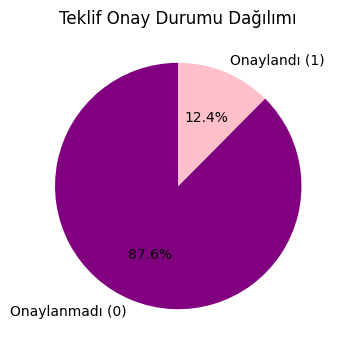

In [1600]:
# Deƒüer sayƒ±larƒ±
counts = df["TEKLƒ∞F ONAY DURUMU"].value_counts()

# Etiketler
labels = ["Onaylanmadƒ± (0)", "Onaylandƒ± (1)"]

# Pie chart
plt.figure(figsize=(4,4))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=["purple","pink"])
plt.title("Teklif Onay Durumu Daƒüƒ±lƒ±mƒ±")
plt.show()

In [1601]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df["TEKLƒ∞F PRƒ∞Mƒ∞"])
plt.title("Teklif Primi - Aykƒ±rƒ± Deƒüer Kontrol√º")
plt.xlabel("Teklif Primi")
plt.show()

In [1602]:
df["TEKLƒ∞F PRƒ∞Mƒ∞"].head()

0   18743
1   13778
2    7814
3   17733
4   10306
Name: TEKLƒ∞F PRƒ∞Mƒ∞, dtype: float64

In [1603]:
max_val = int(df["TEKLƒ∞F PRƒ∞Mƒ∞"].max())

# √ñrn: 5000'lik aralƒ±klar
bins = list(range(0, max_val + 5000, 5000))
labels = [f"{i}-{i+5000}" for i in bins[:-1]]

prim_aralik = pd.cut(df["TEKLƒ∞F PRƒ∞Mƒ∞"], bins=bins, labels=labels, right=False)
pivot = prim_aralik.value_counts().sort_index()

pivot_df = pivot.reset_index()
pivot_df.columns = ["Prim Aralƒ±k", "Frekans"]

print(pivot_df.head(20))  # ilk 20 aralƒ±ƒüƒ± g√∂r


     Prim Aralƒ±k  Frekans
0         0-5000     2047
1     5000-10000     6780
2    10000-15000     5841
3    15000-20000     2156
4    20000-25000      968
5    25000-30000      463
6    30000-35000      240
7    35000-40000      138
8    40000-45000       84
9    45000-50000       45
10   50000-55000       38
11   55000-60000       31
12   60000-65000       24
13   65000-70000       27
14   70000-75000       22
15   75000-80000       23
16   80000-85000       18
17   85000-90000       17
18   90000-95000       11
19  95000-100000       12


Teklif Primi S√ºtunu i√ßin yorumlarƒ±m
- %75‚Äôten fazlasƒ± 5.000‚Äì20.000 TL bandƒ±nda.
- √áok y√ºksek primli teklifler (50.000 TL √ºzeri) nadir ve istisna.
- Modelleme yaparken teklif primi aslƒ±nda olduk√ßa √ßarpƒ±k (skewed) bir daƒüƒ±lƒ±m g√∂steriyor.
- Yani √ßoƒüu m√º≈üteri orta primlerde yoƒüunla≈üƒ±rken, y√ºksek primliler az ve u√ß deƒüer (outlier) gibi davranƒ±yor.
- U√ß deƒüerler var bu da modelin √∂ƒürenmesini zorla≈ütƒ±rabilir silmek veya sƒ±nƒ±r eklemek veri kaybƒ±na sebep verebilir ondan log d√∂n√º≈ü√ºm yaparak normalize ederiz ve u√ß deƒüerlerin etkisi azalƒ±r
- Modelleme √∂ncesi log d√∂n√º≈ü√ºm yapƒ±lmalƒ±

In [1604]:
plt.figure(figsize=(6,4))
sns.boxplot(x="TEKLƒ∞F ONAY DURUMU", y="TEKLƒ∞F PRƒ∞Mƒ∞", data=df, palette="Set2")
plt.xticks([0,1], ["Onaylanmadƒ± (0)", "Onaylandƒ± (1)"])
plt.title("Teklif Primi vs Onay Durumu - Boxplot")
plt.xlabel("Onay Durumu")
plt.ylabel("Teklif Primi")
plt.show()

C:\Users\incie\AppData\Local\Temp\ipykernel_18312\603126332.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="TEKLƒ∞F ONAY DURUMU", y="TEKLƒ∞F PRƒ∞Mƒ∞", data=df, palette="Set2")


Onaylanan tekliflerin neredeyse tamamƒ± d√º≈ü√ºk primlerde ger√ßekle≈ümektedir. Prim arttƒ±k√ßa reddedilme ihtimali hƒ±zla y√ºkselmekte, bu da fiyat duyarlƒ±lƒ±ƒüƒ±nƒ±n √ßok y√ºksek olduƒüunu g√∂stermektedir.

In [1605]:
# Teklif primi s√ºtununu diƒüer deƒüi≈ükenlerle beraber incelerken daƒüƒ±lƒ±m daha normal olmasƒ± i√ßin log d√∂n√º≈ü√ºm yapalƒ±m
# Log d√∂n√º≈ü√ºm√º (aykƒ±rƒ± deƒüer etkisini azaltmak i√ßin)
# Teklif primini log10 tabanƒ±nda d√∂n√º≈üt√ºrelim
df["TEKLƒ∞F PRƒ∞Mƒ∞"] = np.log10(df["TEKLƒ∞F PRƒ∞Mƒ∞"])

# ondalƒ±k basamak g√∂stersin
pd.set_option("display.float_format", "{:.4f}".format)

# Kontrol edelim
print(df[["TEKLƒ∞F PRƒ∞Mƒ∞"]].head())

   TEKLƒ∞F PRƒ∞Mƒ∞
0        4.2728
1        4.1392
2        3.8929
3        4.2488
4        4.0131


In [1607]:
# Bireysel sigortalƒ±lar (O)
df_bireysel = df[df["Sƒ∞GORTALI Tƒ∞Pƒ∞"] == "O"].copy()
df_bireysel = df_bireysel.drop(columns=["Sƒ∞GORTALI Tƒ∞Pƒ∞"])
print("Toplam bireysel m√º≈üteri sayƒ±sƒ±:", len(df_bireysel))

Toplam bireysel m√º≈üteri sayƒ±sƒ±: 13830


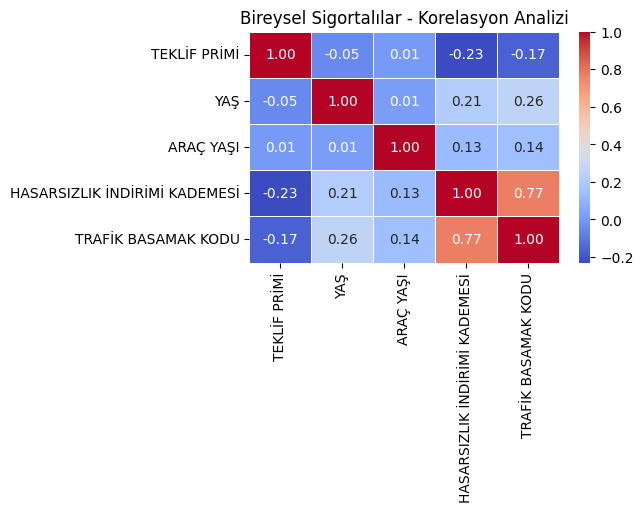

In [1608]:
# Sayƒ±sal kolonlarƒ± se√ßelim
num_cols = ["TEKLƒ∞F PRƒ∞Mƒ∞", "YA≈û", "ARA√á YA≈ûI", 
            "HASARSIZLIK ƒ∞NDƒ∞Rƒ∞Mƒ∞ KADEMESƒ∞", "TRAFƒ∞K BASAMAK KODU"]

# Korelasyon matrisi
corr = df_bireysel[num_cols].corr()

# Heatmap √ßizimi
plt.figure(figsize=(5,3))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Bireysel Sigortalƒ±lar - Korelasyon Analizi")
plt.show()

- Bireysel m√º≈üterilerde teklif primi en √ßok s√ºr√ºc√º ge√ßmi≈üiyle (trafik basamak kodu ve hasarsƒ±zlƒ±k indirimi) ili≈ükilidir. Ara√ß ya≈üƒ± ve m√º≈üteri ya≈üƒ± ise d√º≈ü√ºk korelasyon g√∂stermektedir.
- Ya≈ü ve ara√ß ya≈üƒ±, korelasyon a√ßƒ±sƒ±ndan zayƒ±f ama dolaylƒ± etkileri olabilir

In [1609]:
# Kurumsal m√º≈üteriler
df_kurumsal = df[df["Sƒ∞GORTALI Tƒ∞Pƒ∞"] == "T"].copy()

# Gereksiz s√ºtunlarƒ± d√º≈ü√ºrelim
df_kurumsal = df_kurumsal.drop(columns=["YA≈û", "ƒ∞L√áE","Sƒ∞GORTALI Tƒ∞Pƒ∞"])

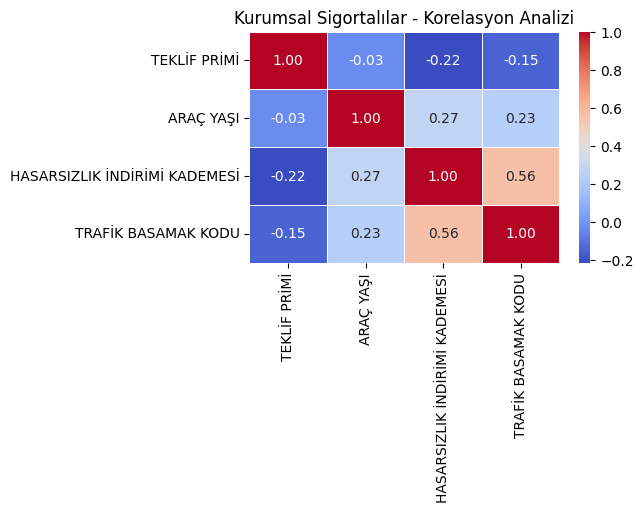

In [1610]:
# Sayƒ±sal kolonlar (aynƒ± se√ßimi kullanalƒ±m)
num_cols = ["TEKLƒ∞F PRƒ∞Mƒ∞", "ARA√á YA≈ûI", 
            "HASARSIZLIK ƒ∞NDƒ∞Rƒ∞Mƒ∞ KADEMESƒ∞", "TRAFƒ∞K BASAMAK KODU"]

# Korelasyon matrisi
corr_kurumsal = df_kurumsal[num_cols].corr()

# Heatmap √ßizimi
plt.figure(figsize=(5,3))
sns.heatmap(corr_kurumsal, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Kurumsal Sigortalƒ±lar - Korelasyon Analizi")
plt.show()

Kurumsal m√º≈üterilerde prim hesaplamasƒ± bireysellere kƒ±yasla daha daƒüƒ±nƒ±k. Prim √ºzerinde en etkili deƒüi≈ükenler yine hasarsƒ±zlƒ±k indirimi ve trafik basamaƒüƒ±dƒ±r; ancak bu etki bireysellere g√∂re daha zayƒ±ftƒ±r. Ara√ß ya≈üƒ± kurumsal segmentte daha anlamlƒ±dƒ±r.

In [1611]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1) Marka bazlƒ± onay oranƒ±
brand_onay_bireysel = (
    df_bireysel.groupby("MARKA")["TEKLƒ∞F ONAY DURUMU"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
sns.barplot(x="TEKLƒ∞F ONAY DURUMU", y="MARKA", data=brand_onay_bireysel, palette="viridis", ax=axes[0,0])
axes[0,0].set_title("Bireysel - Markalara G√∂re Onay Oranƒ±")
axes[0,0].set_xlabel("Onay Oranƒ±")
axes[0,0].set_ylabel("Marka")

# 2) Yakƒ±t tipine g√∂re onay oranƒ±
sns.barplot(x="YAKIT Tƒ∞Pƒ∞", y="TEKLƒ∞F ONAY DURUMU", 
            data=df_bireysel, estimator=lambda x: sum(x)/len(x), ci=None, palette="Set2", ax=axes[0,1])
axes[0,1].set_title("Bireysel - Yakƒ±t Tipine G√∂re Onay Oranƒ±")
axes[0,1].set_ylabel("Onay Oranƒ±")

# 3) Portf√∂y ayrƒ±mƒ±na g√∂re onay oranƒ±
sns.barplot(x="PORTF√ñY AYRIMI", y="TEKLƒ∞F ONAY DURUMU", 
            data=df_bireysel, estimator=lambda x: sum(x)/len(x), ci=None, palette="Set3", ax=axes[1,0])
axes[1,0].set_title("Bireysel - Portf√∂y Ayrƒ±mƒ±na G√∂re Onay Oranƒ±")
axes[1,0].set_ylabel("Onay Oranƒ±")

# 4) ƒ∞l bazlƒ± onay oranƒ±
il_onay_bireysel = (
    df_bireysel.groupby("ƒ∞L")["TEKLƒ∞F ONAY DURUMU"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
sns.barplot(x="TEKLƒ∞F ONAY DURUMU", y="ƒ∞L", data=il_onay_bireysel, palette="magma", ax=axes[1,1])
axes[1,1].set_title("Bireysel - ƒ∞llere G√∂re Onay Oranƒ±")
axes[1,1].set_xlabel("Onay Oranƒ±")
axes[1,1].set_ylabel("ƒ∞l")

plt.tight_layout()
plt.show()

C:\Users\incie\AppData\Local\Temp\ipykernel_18312\504398626.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TEKLƒ∞F ONAY DURUMU", y="MARKA", data=brand_onay_bireysel, palette="viridis", ax=axes[0,0])
C:\Users\incie\AppData\Local\Temp\ipykernel_18312\504398626.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="YAKIT Tƒ∞Pƒ∞", y="TEKLƒ∞F ONAY DURUMU",
C:\Users\incie\AppData\Local\Temp\ipykernel_18312\504398626.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="YAKIT Tƒ∞Pƒ∞", y="TEKLƒ∞F ONAY DURUMU",
C:\Users\incie\AppData\Local\Temp\ipykernel_18312\504398626.py:22: FutureWarning: 

The `ci` parameter is deprecated.

1) Markalara G√∂re Onay Oranƒ±:
- Toyota ve Honda gibi markalarƒ±n onay oranƒ± diƒüer markalara g√∂re daha y√ºksek.
- Renault, Ford, Volkswagen gibi markalarda onay oranƒ± daha d√º≈ü√ºk.
- Bu, m√º≈üteri kitlesinin markaya g√∂re risk/fiyat hassasiyetinin deƒüi≈ütiƒüini g√∂steriyor.

2) Yakƒ±t Tipine G√∂re Onay Oranƒ±:
- Benzinli ara√ß sahiplerinin teklif onay oranƒ± dizel ara√ß sahiplerinden belirgin ≈üekilde daha y√ºksek.
- Bu, dizel ara√ßlarƒ±n daha y√ºksek primlerle teklif edildiƒüini veya dizel kullanƒ±cƒ±larƒ±nƒ±n fiyat duyarlƒ±lƒ±ƒüƒ±nƒ±n daha y√ºksek olduƒüunu d√º≈ü√ºnd√ºr√ºyor.

3) Portf√∂y Ayrƒ±mƒ±na G√∂re Onay Oranƒ±:
- En y√ºksek onay oranƒ± %40 civarƒ±nda ‚ÄúYenileme‚Äù grubunda.
- ‚ÄúYeni ƒ∞≈ü‚Äù, ‚Äúƒ∞lk Defa Sigortalƒ±‚Äù ve ‚ÄúSƒ±fƒ±r Ara√ß‚Äù gruplarƒ±nda onay oranlarƒ± %5‚Äì10 aralƒ±ƒüƒ±nda √ßok d√º≈ü√ºk.
- Yani mevcut m√º≈üteriyi elde tutmak √ßok daha kolay, yeni m√º≈üteri kazanƒ±mƒ± ise zor.

4) ƒ∞llere G√∂re Onay Oranƒ±:
- ƒ∞zmir‚Äôde onay oranƒ± %12 civarƒ±nda en y√ºksek.
- Ankara %10, ƒ∞stanbul ise %8 civarƒ±nda ‚Üí ƒ∞stanbul‚Äôda fiyat hassasiyeti daha y√ºksek olabilir.
- Bu da b√∂lgesel farklƒ±lƒ±klarƒ±n stratejiye dahil edilmesi gerektiƒüini g√∂steriyor.

In [1612]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1) Marka bazlƒ± onay oranƒ±
brand_onay = (
    df_kurumsal.groupby("MARKA")["TEKLƒ∞F ONAY DURUMU"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
sns.barplot(x="TEKLƒ∞F ONAY DURUMU", y="MARKA", data=brand_onay, palette="viridis", ax=axes[0,0])
axes[0,0].set_title("Kurumsal - Markalara G√∂re Onay Oranƒ±")
axes[0,0].set_xlabel("Onay Oranƒ±")
axes[0,0].set_ylabel("Marka")

# 2) Yakƒ±t tipine g√∂re onay oranƒ±
sns.barplot(x="YAKIT Tƒ∞Pƒ∞", y="TEKLƒ∞F ONAY DURUMU", 
            data=df_kurumsal, estimator=lambda x: sum(x)/len(x), ci=None, palette="Set2", ax=axes[0,1])
axes[0,1].set_title("Kurumsal - Yakƒ±t Tipine G√∂re Onay Oranƒ±")
axes[0,1].set_ylabel("Onay Oranƒ±")

# 3) Portf√∂y ayrƒ±mƒ±na g√∂re onay oranƒ±
sns.barplot(x="PORTF√ñY AYRIMI", y="TEKLƒ∞F ONAY DURUMU", 
            data=df_kurumsal, estimator=lambda x: sum(x)/len(x), ci=None, palette="Set3", ax=axes[1,0])
axes[1,0].set_title("Kurumsal - Portf√∂y Ayrƒ±mƒ±na G√∂re Onay Oranƒ±")
axes[1,0].set_ylabel("Onay Oranƒ±")

# 4) ƒ∞l bazlƒ± onay oranƒ± (√ßok il varsa okunaklƒ± olsun diye sƒ±raladƒ±k)
il_onay = (
    df_kurumsal.groupby("ƒ∞L")["TEKLƒ∞F ONAY DURUMU"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
sns.barplot(x="TEKLƒ∞F ONAY DURUMU", y="ƒ∞L", data=il_onay, palette="magma", ax=axes[1,1])
axes[1,1].set_title("Kurumsal - ƒ∞llere G√∂re Onay Oranƒ±")
axes[1,1].set_xlabel("Onay Oranƒ±")
axes[1,1].set_ylabel("ƒ∞l")

plt.tight_layout()
plt.show()

C:\Users\incie\AppData\Local\Temp\ipykernel_18312\3365473767.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TEKLƒ∞F ONAY DURUMU", y="MARKA", data=brand_onay, palette="viridis", ax=axes[0,0])
C:\Users\incie\AppData\Local\Temp\ipykernel_18312\3365473767.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="YAKIT Tƒ∞Pƒ∞", y="TEKLƒ∞F ONAY DURUMU",
C:\Users\incie\AppData\Local\Temp\ipykernel_18312\3365473767.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="YAKIT Tƒ∞Pƒ∞", y="TEKLƒ∞F ONAY DURUMU",
C:\Users\incie\AppData\Local\Temp\ipykernel_18312\3365473767.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use 

1) Markalara G√∂re Onay Oranƒ±:
- Honda ve Renault markalƒ± ara√ßlarda onay oranƒ± %30‚Äôun √ºzerinde, diƒüer markalara g√∂re daha y√ºksek.
- Ford, Mercedes, Toyota ve Volkswagen‚Äôde oranlar daha d√º≈ü√ºk (yakla≈üƒ±k %15‚Äì20).
- Bu durum, kurumsal filolarda bazƒ± markalarƒ±n daha cazip g√∂r√ºld√ºƒü√ºn√º ya da fiyatlandƒ±rmada avantajlƒ± olduƒüunu g√∂steriyor.

2) Yakƒ±t Tipine G√∂re Onay Oranƒ±:
- Benzinli ara√ßlarda onay oranƒ± (%25) dizel ara√ßlardan (%17) daha y√ºksek.
- Bireysellerde olduƒüu gibi kurumsallarda da benzinli ara√ßlar daha kolay onaylanƒ±yor ‚Üí muhtemelen primleri daha d√º≈ü√ºk veya daha uygun fiyatlandƒ±rƒ±lƒ±yor.

3) Portf√∂y Ayrƒ±mƒ±na G√∂re Onay Oranƒ±:
- En y√ºksek onay oranƒ± ‚ÄúYenileme‚Äù ve ‚ÄúSƒ±fƒ±r Ara√ß‚Äù gruplarƒ±nda (~%39).
- ‚ÄúYeni ƒ∞≈ü‚Äù (%18) ve ‚Äúƒ∞lk Defa Sigortalƒ±‚Äù (%11) gruplarƒ±nda onay oranlarƒ± √ßok d√º≈ü√ºk.
- Bu, kurumsal tarafta da bireysellerde olduƒüu gibi mevcut m√º≈üteriyi elde tutmanƒ±n √ßok daha kolay olduƒüunu, yeni m√º≈üteri kazanƒ±mƒ±nƒ±n zor olduƒüunu g√∂steriyor.

4) ƒ∞llere G√∂re Onay Oranƒ±:
- ƒ∞zmir ve ƒ∞stanbul‚Äôda onay oranƒ± %20‚Äônin √ºzerinde.
- Ankara‚Äôda ise oran %15 civarƒ±nda ‚Üí Ankara‚Äôdaki kurumsal m√º≈üteriler daha fiyat duyarlƒ± olabilir.
- Bu, b√∂lgesel farklƒ±lƒ±klarƒ±n kurumsal tarafta da belirgin olduƒüunu g√∂steriyor.

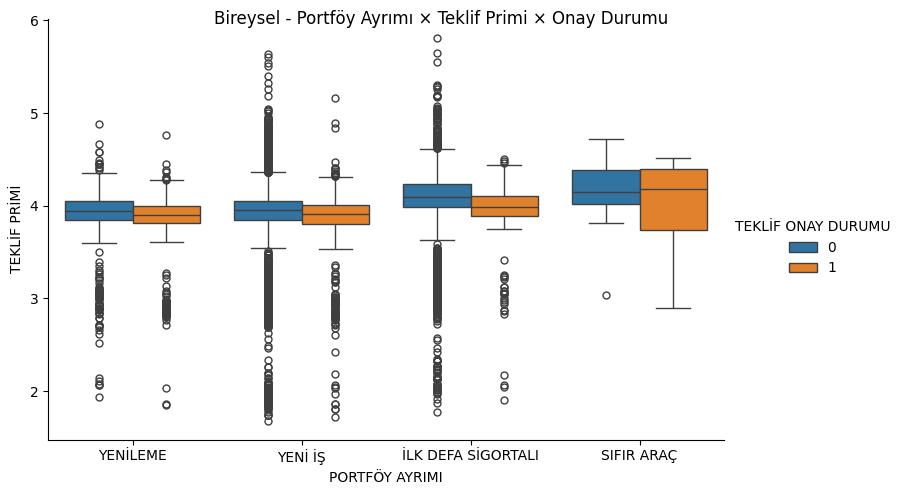

In [1613]:
g = sns.catplot(x="PORTF√ñY AYRIMI", y="TEKLƒ∞F PRƒ∞Mƒ∞", hue="TEKLƒ∞F ONAY DURUMU", 
                kind="box", data=df_bireysel, height=5, aspect=1.5)
g.fig.suptitle("Bireysel - Portf√∂y Ayrƒ±mƒ± √ó Teklif Primi √ó Onay Durumu")
plt.show()

- Yenileme grubunda, onaylanan ve onaylanmayalar arasƒ±nda √ßok fark yok√ß Primden daha √ßok m√º≈üteri baƒülƒ±lƒ±ƒüƒ± etkili gibi
- Yeni i≈ü i√ßinde primin √ßok etkisi yok diƒüer deƒüi≈ükenlerle beraber bakmak daha faydalƒ± olur
- ƒ∞lk defa sigortalƒ± olanlarda prim y√ºkseldik√ße onaylanmama olasƒ±lƒ±ƒüƒ± artƒ±yor. Bu fiyat duyarlƒ±lƒ±ƒüƒ± olduƒüunu g√∂sterir
- Sƒ±fƒ±r ara√ß grubunda daha dengesiz prim var, onaylananlarƒ±n primlerin medyanƒ± daha y√ºksek burada 

In [1617]:
g = sns.catplot(x="PORTF√ñY AYRIMI", y="TEKLƒ∞F PRƒ∞Mƒ∞", hue="TEKLƒ∞F ONAY DURUMU", 
                kind="box", data=df_kurumsal, height=5, aspect=1.5)
g.fig.suptitle("Kurumsal - Portf√∂y Ayrƒ±mƒ± √ó Teklif Primi √ó Onay Durumu")
plt.show()

- Kurumsal sigortalƒ±lar bireysellere kƒ±yasla daha fiyat duyarlƒ± g√∂r√ºn√ºyor√ß Prim arttƒ±k√ßa bariz ≈üekilde onay ihtimali d√º≈ü√ºyor
- Bireyselin aksine kurumsalda sƒ±fƒ±r ara√ß fiyata kar≈üƒ± daha duyarlƒ± onay olasƒ±lƒ±ƒüƒ± √ßok d√º≈ü√ºk
- En y√ºksek prim teklifleri yeni i≈ü ve ilk defa sigortalƒ±larda g√∂z√ºk√ºyor

ƒ∞l√ße deƒüi≈ükenini istatistiksel olarak teklif onay durumu arasƒ±nda anlamlƒ± bir fark olup olmadƒ±ƒüƒ±na ki-kare testi ile bakalƒ±m

In [1616]:
contingency = pd.crosstab(df_bireysel["ƒ∞L√áE"], df_bireysel["TEKLƒ∞F ONAY DURUMU"])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-Square:", chi2, "p-value:", p)


Chi-Square: 125.76982355979246 p-value: 0.013381369588683113


p < 0.05 ‚Üí istatistiksel olarak anlamlƒ± fark var.

Yani il√ße ile teklif onay durumu arasƒ±nda baƒüƒ±msƒ±zlƒ±k yok, yani il√ße deƒüi≈ükeni onay √ºzerinde etkili.

Ba≈üka bir deyi≈üle, bazƒ± il√ßelerde m√º≈üterilerin teklifi onaylama olasƒ±lƒ±ƒüƒ± diƒüer il√ßelere g√∂re anlamlƒ± derecede farklƒ±.

### Bƒ∞REYSEL Sƒ∞GORTALILAR ƒ∞√áƒ∞N YAPILACAK MODELLEMELER:
#### 1) Lojistik regresyon

In [1618]:
ilce_target = df_bireysel.groupby("ƒ∞L√áE")["TEKLƒ∞F ONAY DURUMU"].mean()
df_bireysel["ƒ∞L√áE_ENCODED"] = df_bireysel["ƒ∞L√áE"].map(ilce_target)
df_bireysel = df_bireysel.drop(columns=["ƒ∞L√áE"])

df_bireysel = pd.get_dummies(
    df_bireysel, 
    columns=["YAKIT Tƒ∞Pƒ∞", "PORTF√ñY AYRIMI", "MARKA", "ƒ∞L"], 
    drop_first=True, 
    dtype=int )

Dummy tuzaƒüƒ±na d√º≈ümemek i√ßin: "drop_first=True" b√∂ylelikle ilk kategoriyi (sƒ±fƒ±r ara√ß) atƒ±yor. Portf√∂y ayrƒ±mƒ±nda diƒüerlerinin hepsinin 0 olduƒüu durum sƒ±fƒ±r ara√ß kategorisine denk geliyor.

In [1619]:
# Baƒüƒ±mlƒ±- Baƒüƒ±msƒ±z Deƒüi≈ükenleri B√∂lme | Teklif onay durumu hedef deƒüi≈ükenimiz (y)
X_bireysel = df_bireysel.drop(columns=["TEKLƒ∞F ONAY DURUMU"])
y_bireysel = df_bireysel["TEKLƒ∞F ONAY DURUMU"]

In [1620]:
# Test ve eƒüitim verisi olu≈üturma
X_train_bireysel, X_test_bireysel, y_train_bireysel, y_test_bireysel = train_test_split(
X_bireysel, y_bireysel, test_size=0.3, stratify=y_bireysel, random_state=42)

In [1621]:
# Veriyi standardize edelim. √á√ºnk√º √∂rneƒüin label encodingte il√ße s√ºtunu 0-500 arasƒ± deƒüer alƒ±yor ve bu b√ºy√ºk deƒüerlerin etkisi modele olduƒüundan fazla g√∂r√ºnebilir.
# B√∂ylelikle t√ºm deƒüi≈ükenler e≈üit tabandan ba≈ülatƒ±lƒ±r, katsayƒ±lar adil kar≈üƒ±la≈ütƒ±rƒ±lƒ±r
scaler = StandardScaler()
X_train_scaled_bireysel = scaler.fit_transform(X_train_bireysel)
X_test_scaled_bireysel = scaler.transform(X_test_bireysel)

In [1622]:
# Model kuralƒ±m
log_reg_bireysel = LogisticRegression(max_iter=2000, class_weight="balanced", solver="lbfgs")
log_reg_bireysel.fit(X_train_scaled_bireysel, y_train_bireysel)

LogisticRegression(class_weight='balanced', max_iter=2000)

Accuracy: 0.753
Precision: 0.215
Recall: 0.58
F1-score: 0.314
ROC-AUC: 0.735


<Figure size 300x300 with 0 Axes>

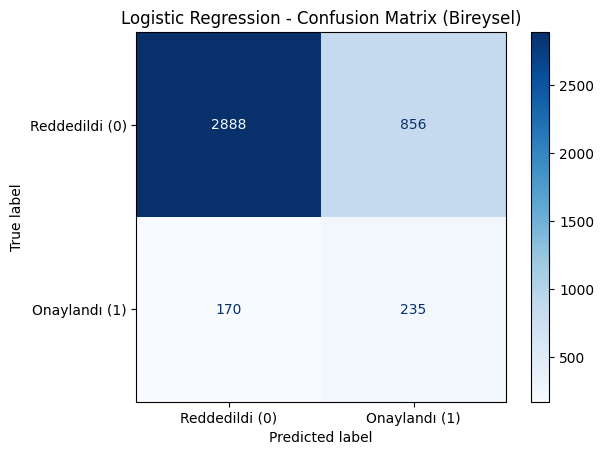

In [1623]:
# Tahminler
y_pred_bireysel = log_reg_bireysel.predict(X_test_scaled_bireysel)
y_proba_bireysel= log_reg_bireysel.predict_proba(X_test_scaled_bireysel)[:,1]

# Metrikler
print("Accuracy:", round(accuracy_score(y_test_bireysel, y_pred_bireysel), 3))
print("Precision:", round(precision_score(y_test_bireysel, y_pred_bireysel), 3))
print("Recall:", round(recall_score(y_test_bireysel, y_pred_bireysel), 3))
print("F1-score:", round(f1_score(y_test_bireysel, y_pred_bireysel), 3))
print("ROC-AUC:", round(roc_auc_score(y_test_bireysel, y_proba_bireysel), 3))

cm = confusion_matrix(y_test_bireysel, y_pred_bireysel)

plt.figure(figsize=(3,3))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Reddedildi (0)", "Onaylandƒ± (1)"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Logistic Regression - Confusion Matrix (Bireysel)")
plt.show()

Accuracy: 0.741
‚Üí Modelin genel doƒüruluk oranƒ± %74. Yani her 4 tahminden 3‚Äô√º doƒüru.

Precision: 0.22
‚Üí ‚ÄúOnaylandƒ±‚Äù dediƒüi her 100 m√º≈üteriden sadece 22‚Äôsi ger√ßekten onay almƒ±≈ü.
‚Üí Yani yanlƒ±≈ü pozitif (yanlƒ±≈ü alarm) oranƒ± y√ºksek.

Recall: 0.649
‚Üí Onaylƒ± m√º≈üterilerin yakla≈üƒ±k %65‚Äôini yakalayabiliyor.
‚Üí Yani √ßoƒüu ger√ßek ‚Äúonaylƒ±‚Äù teklifi g√∂rebiliyor.

F1-score: 0.329
‚Üí Precision d√º≈ü√ºk ama Recall y√ºksek ‚Üí F1 orta seviyede √ßƒ±ktƒ±.

ROC-AUC: 0.763
‚Üí %76 ayrƒ±≈ütƒ±rma g√ºc√º ‚Üí modelin reddedilen ve onaylanan m√º≈üterileri ayƒ±rt etme kabiliyeti fena deƒüil.

Genel Yorumum:
- Model, reddedilenleri √ßoƒüunlukla doƒüru tahmin ediyor, ama onaylƒ±larƒ± daha az sayƒ±da doƒüru tahmin edebiliyor.
- Recall y√ºksek (%65) ‚Üí yani model onaylƒ± m√º≈üterilerin √∂nemli bir kƒ±smƒ±nƒ± yakalayabiliyor. Bu, m√º≈üteri kaybƒ±nƒ± azaltmak isteyen bir senaryo i√ßin avantaj.
- Ancak Precision d√º≈ü√ºk (%22) ‚Üí model √ßok fazla m√º≈üteriye yanlƒ±≈ü ‚Äúonaylandƒ±‚Äù dediƒüi i√ßin yanlƒ±≈ü alarm riski y√ºksek.
- ROC-AUC 0.76 ‚Üí modelin ayrƒ±≈ütƒ±rma kabiliyeti orta-iyi seviyede.

In [1628]:
# Katsayƒ±larƒ± al
coefficients = log_reg_bireysel.coef_[0]
features = X_train_bireysel.columns

coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)

# G√∂rselle≈ütirme
plt.figure(figsize=(6,4))
sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="coolwarm")
plt.title("Logistic Regression - Feature Importance (Bireysel)")
plt.axvline(0, color="black", linewidth=1)
plt.show()

# ƒ∞lk 15 √∂zelliƒüi tablo olarak g√∂sterelim
coef_df.head(20)

C:\Users\incie\AppData\Local\Temp\ipykernel_18312\71708143.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="coolwarm")


Feature  Coefficient
8             PORTF√ñY AYRIMI_YENƒ∞LEME       0.5649
5                        ƒ∞L√áE_ENCODED       0.3149
13                       MARKA_TOYOTA       0.1736
15                        ƒ∞L_ƒ∞STANBUL       0.1132
10                        MARKA_HONDA       0.1079
7              PORTF√ñY AYRIMI_YENƒ∞ ƒ∞≈û       0.0854
11                     MARKA_MERCEDES       0.0694
3                                 YA≈û       0.0644
16                           ƒ∞L_ƒ∞ZMƒ∞R       0.0572
1                 TRAFƒ∞K BASAMAK KODU       0.0183
12                      MARKA_RENAULT      -0.0376
14                   MARKA_VOLKSWAGEN      -0.0762
0       HASARSIZLIK ƒ∞NDƒ∞Rƒ∞Mƒ∞ KADEMESƒ∞      -0.0860
9   PORTF√ñY AYRIMI_ƒ∞LK DEFA Sƒ∞GORTALI      -0.1012
6                    YAKIT Tƒ∞Pƒ∞_DIZEL      -0.1353
2                           ARA√á YA≈ûI      -0.1438
4                        TEKLƒ∞F PRƒ∞Mƒ∞      -0.1900

- En pozitif etki: YENƒ∞LEME ‚Üí mevcut m√º≈üteri korunuyor.

- En negatif etki: TEKLƒ∞F PRƒ∞Mƒ∞ ‚Üí prim y√ºkseldik√ße onay d√º≈ü√ºyor.

### 2) Random Forest

En iyi parametrleri bulmak i√ßin tune edelim

In [1629]:
# Parametre aralƒ±klarƒ±
param_dist = {
    "n_estimators": [100, 300, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
}

# Model
rf_bireysel = RandomForestClassifier(
    class_weight="balanced", 
    random_state=42, 
    n_jobs=-1
)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_bireysel,
    param_distributions=param_dist,
    n_iter=30,             # ka√ß farklƒ± kombinasyon denenecek
    scoring="f1",          # dengesiz veri ‚Üí F1 √∂nemli
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Fit
random_search.fit(X_train_bireysel, y_train_bireysel)

print("En iyi parametreler:", random_search.best_params_)
print("En iyi F1 skoru:", random_search.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
En iyi parametreler: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None}
En iyi F1 skoru: 0.3366981455848652


In [1631]:
# Final Model
rf_best_bireysel = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=4,
    max_features="sqrt",
    max_depth=None,
    class_weight="balanced",  
    random_state=42,
    n_jobs=-1
)

# Eƒüitme
rf_best_bireysel.fit(X_train_bireysel, y_train_bireysel)

# Tahminler
y_pred_rf_bireysel = rf_best_bireysel.predict(X_test_bireysel)
y_proba_rf_bireysel = rf_best_bireysel.predict_proba(X_test_bireysel)[:,1]

Random Forest Sonu√ßlarƒ± (Bireysel - Tuned)
Accuracy: 0.878
Precision: 0.359
Recall: 0.319
F1-score: 0.338
ROC-AUC: 0.739


<Figure size 600x400 with 0 Axes>

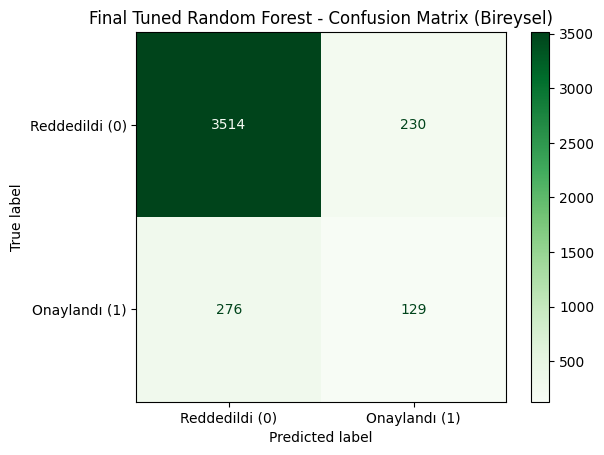

In [1632]:
# Metrikler
print("Random Forest Sonu√ßlarƒ± (Bireysel - Tuned)")
print("Accuracy:", round(accuracy_score(y_test_bireysel, y_pred_rf_bireysel), 3))
print("Precision:", round(precision_score(y_test_bireysel, y_pred_rf_bireysel), 3))
print("Recall:", round(recall_score(y_test_bireysel, y_pred_rf_bireysel), 3))
print("F1-score:", round(f1_score(y_test_bireysel, y_pred_rf_bireysel), 3))
print("ROC-AUC:", round(roc_auc_score(y_test_bireysel, y_proba_rf_bireysel), 3))

# Confusion Matrix
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test_bireysel, y_pred_rf_bireysel)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Reddedildi (0)", "Onaylandƒ± (1)"])
disp.plot(cmap="Greens", values_format="d")
plt.title("Final Tuned Random Forest - Confusion Matrix (Bireysel)")
plt.show()

Accuracy: 0.88
‚Üí Genel doƒüruluk y√ºksek g√∂r√ºn√ºyor (%88). Ancak bu, sƒ±nƒ±f dengesizliƒüi nedeniyle biraz yanƒ±ltƒ±cƒ± olabilir.

Precision: 0.36
‚Üí ‚ÄúOnaylandƒ±‚Äù dediƒüi her 3 ki≈üiden 1‚Äôi ger√ßekten onaylƒ±. Yanlƒ±≈ü alarmlar azalmƒ±≈ü.

Recall: 0.32
‚Üí Onaylƒ± m√º≈üterilerin yalnƒ±zca %33‚Äô√ºn√º yakalayabiliyor. Yani model, √ßoƒüu onaylƒ± m√º≈üteriyi reddedilmi≈ü gibi tahmin ediyor.

F1-score: 0.34
‚Üí Precision ve Recall dengesi orta d√ºzeyde.

ROC-AUC: 0.74
‚Üí Reddedilen ve onaylananlarƒ± ayƒ±rt etme kabiliyeti orta-iyi seviyede.

Genel Yorum:
- Random Forest g√º√ßl√º bir ≈üekilde ‚Äúreddedildi‚Äù sƒ±nƒ±fƒ±na odaklanƒ±yor.
- Precision y√ºkselmi≈ü (yanlƒ±≈ü alarmlar azalmƒ±≈ü), ama recall d√º≈üm√º≈ü (onaylƒ± m√º≈üteri kaybƒ± artmƒ±≈ü).

In [1633]:
# Feature importance deƒüerlerini al
importances = rf_best_bireysel.feature_importances_
features = X_train_bireysel.columns

fi_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# G√∂rselle≈ütirme
plt.figure(figsize=(6,4))
sns.barplot(x="Importance", y="Feature", data=fi_df, palette="viridis")
plt.title("Random Forest - Feature Importance (Bireysel)")
plt.show()

# ƒ∞lk 15 √∂zelliƒüi tablo olarak da g√∂sterelim
fi_df.head(15)

C:\Users\incie\AppData\Local\Temp\ipykernel_18312\2310335364.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=fi_df, palette="viridis")


Feature  Importance
4                        TEKLƒ∞F PRƒ∞Mƒ∞      0.2411
5                        ƒ∞L√áE_ENCODED      0.1576
3                                 YA≈û      0.1501
8             PORTF√ñY AYRIMI_YENƒ∞LEME      0.1032
2                           ARA√á YA≈ûI      0.0685
0       HASARSIZLIK ƒ∞NDƒ∞Rƒ∞Mƒ∞ KADEMESƒ∞      0.0538
1                 TRAFƒ∞K BASAMAK KODU      0.0496
7              PORTF√ñY AYRIMI_YENƒ∞ ƒ∞≈û      0.0323
6                    YAKIT Tƒ∞Pƒ∞_DIZEL      0.0243
15                        ƒ∞L_ƒ∞STANBUL      0.0218
14                   MARKA_VOLKSWAGEN      0.0205
13                       MARKA_TOYOTA      0.0169
11                     MARKA_MERCEDES      0.0161
9   PORTF√ñY AYRIMI_ƒ∞LK DEFA Sƒ∞GORTALI      0.0159
16                           ƒ∞L_ƒ∞ZMƒ∞R      0.0122

En √ñnemli Deƒüi≈ükenler:

- Teklif Primi (~0.2)
‚Üí Modelin en √ßok dikkat ettiƒüi deƒüi≈üken.
‚Üí Prim y√ºkseldik√ße onay alma ihtimali ciddi ≈üekilde deƒüi≈üiyor (genelde azalƒ±yor).
- ƒ∞l√ße Encoded (~0.16)
‚Üí ƒ∞l√ßeler arasƒ±nda belirgin farklƒ±lƒ±klar var. Bazƒ± il√ßelerde onay olasƒ±lƒ±ƒüƒ± y√ºksek, bazƒ±larƒ±nda d√º≈ü√ºk.
- Ya≈ü (~0.15)
‚Üí M√º≈üteri ya≈üƒ± √∂nemli bir fakt√∂r. Ya≈ü ilerledik√ße risk profili ve onay davranƒ±≈üƒ± deƒüi≈üiyor.
- Portf√∂y Ayrƒ±mƒ± ‚Äì Yenileme (~0.10)
‚Üí Yenileme m√º≈üterileri √ßok daha y√ºksek onay alƒ±yor ‚Üí sadƒ±k m√º≈üteri etkisi.

Daha Az Etkili Deƒüi≈ükenler:
- Yakƒ±t Tipi ‚Äì Dizel (~0.02) ‚Üí Dizel ara√ßlar i√ßin ufak fark var.
- ƒ∞ller (ƒ∞stanbul, ƒ∞zmir) (~0.02 civarƒ±) ‚Üí B√∂lgesel farklƒ±lƒ±k sƒ±nƒ±rlƒ± da olsa mevcut.
- Markalar (Volkswagen, Toyota, Mercedes, Honda, Renault) ‚Üí Markalarƒ±n etkisi √ßok d√º≈ü√ºk. Bu, Random Forest‚Äôƒ±n kararlarƒ±nda markayƒ± fazla ayƒ±rt edici bulmadƒ±ƒüƒ±nƒ± g√∂steriyor.

Genel Yorum:
- Prim ve demografik fakt√∂rler (il√ße, ya≈ü) ‚Üí en kritik belirleyiciler.
- Sadƒ±k m√º≈üteri (yenileme) ‚Üí onay ihtimalini artƒ±rƒ±yor.
- Marka, yakƒ±t tipi, il gibi deƒüi≈ükenler g√∂rece daha az √∂nem ta≈üƒ±yor.

### 3) XGBoost

En iyi parametrleri bulmak i√ßin tune edelim

In [1634]:
# Parametre aralƒ±klarƒ±
param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "min_child_weight": [1, 3, 5],
    "gamma": [0, 1, 5],
    "scale_pos_weight": [1, 5, 10]   # sƒ±nƒ±f dengesizliƒüi i√ßin
}

# Model
xgb_bireysel = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

# RandomizedSearchCV
random_search_xgb_bireysel = RandomizedSearchCV(
    estimator=xgb_bireysel,
    param_distributions=param_dist,
    n_iter=30,            # 30 kombinasyon dene
    scoring="f1",         # dengesiz sƒ±nƒ±flar i√ßin F1 daha uygun
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit
random_search_xgb_bireysel.fit(X_train_bireysel, y_train_bireysel)

print("En iyi parametreler:", random_search_xgb_bireysel.best_params_)
print("En iyi F1 skoru:", random_search_xgb_bireysel.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
En iyi parametreler: {'subsample': 1.0, 'scale_pos_weight': 5, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 5, 'colsample_bytree': 1.0}
En iyi F1 skoru: 0.34685789377732507


Final Tuned XGBoost Sonu√ßlarƒ± (Bireysel)
Accuracy: 0.868
Precision: 0.345
Recall: 0.39
F1-score: 0.366
ROC-AUC: 0.756


<Figure size 600x400 with 0 Axes>

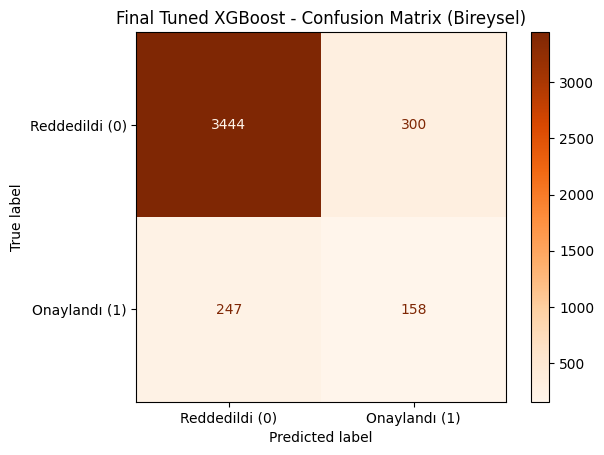

In [1635]:
# Final tuned model
xgb_best_bireysel = XGBClassifier(
    subsample=1.0,
    scale_pos_weight=5,
    n_estimators=300,
    min_child_weight=1,
    max_depth=3,
    learning_rate=0.2,
    gamma=5,
    colsample_bytree=1.0,
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

# Eƒüitme
xgb_best_bireysel.fit(X_train_bireysel, y_train_bireysel)

# Tahminler
y_pred_xgb_bireysel = xgb_best_bireysel.predict(X_test_bireysel)
y_proba_xgb_bireysel = xgb_best_bireysel.predict_proba(X_test_bireysel)[:,1]

# Metrikler
print("Final Tuned XGBoost Sonu√ßlarƒ± (Bireysel)")
print("Accuracy:", round(accuracy_score(y_test_bireysel, y_pred_xgb_bireysel), 3))
print("Precision:", round(precision_score(y_test_bireysel, y_pred_xgb_bireysel), 3))
print("Recall:", round(recall_score(y_test_bireysel, y_pred_xgb_bireysel), 3))
print("F1-score:", round(f1_score(y_test_bireysel, y_pred_xgb_bireysel), 3))
print("ROC-AUC:", round(roc_auc_score(y_test_bireysel, y_proba_xgb_bireysel), 3))

# Confusion Matrix
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test_bireysel, y_pred_xgb_bireysel)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Reddedildi (0)", "Onaylandƒ± (1)"])
disp.plot(cmap="Oranges", values_format="d")
plt.title("Final Tuned XGBoost - Confusion Matrix (Bireysel)")
plt.show()

Accuracy: 0.87
‚Üí Modelin genel doƒüruluk oranƒ± olduk√ßa y√ºksek (%86). Ancak bu, reddedilenlerin √ßok fazla olmasƒ± nedeniyle yanƒ±ltƒ±cƒ± olabilir.

Precision: 0.345
‚Üí ‚ÄúOnaylandƒ±‚Äù dediƒüi her 3 ki≈üiden yalnƒ±zca 1‚Äôi ger√ßekten onaylanƒ±yor. Yanlƒ±≈ü alarmlar h√¢l√¢ var ama Logistic Regression‚Äôa g√∂re daha y√ºksek.

Recall: 0.39
‚Üí Onaylƒ± m√º≈üterilerin yakla≈üƒ±k %39‚Äôunu yakalayabiliyor. Random Forest‚Äôtan biraz daha iyi, ama Logistic Regression‚Äôdaki kadar y√ºksek deƒüil.

F1-score: 0.366
‚Üí Precision ve Recall dengesi ortalama seviyede.

ROC-AUC: 0.756
‚Üí Modelin ayrƒ±≈ütƒ±rma kabiliyeti (reddedilen vs onaylanan) orta-iyi d√ºzeyde. Random Forest‚Äôa benzer, Logistic Regression‚Äôa yakƒ±n.

Genel Yorumum:
- XGBoost, reddedilenleri √ßok g√º√ßl√º ≈üekilde doƒüru yakalƒ±yor.
- Onaylanan m√º≈üterilerin %39‚Äôunu yakalƒ±yor (Recall), bu da Random Forest‚Äôtan daha iyi.
- Ancak Precision h√¢l√¢ d√º≈ü√ºk, yani ‚Äúyanlƒ±≈ü alarm‚Äù riski var.

C:\Users\incie\AppData\Local\Temp\ipykernel_18312\1011369664.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=fi_xgb, palette="Oranges")


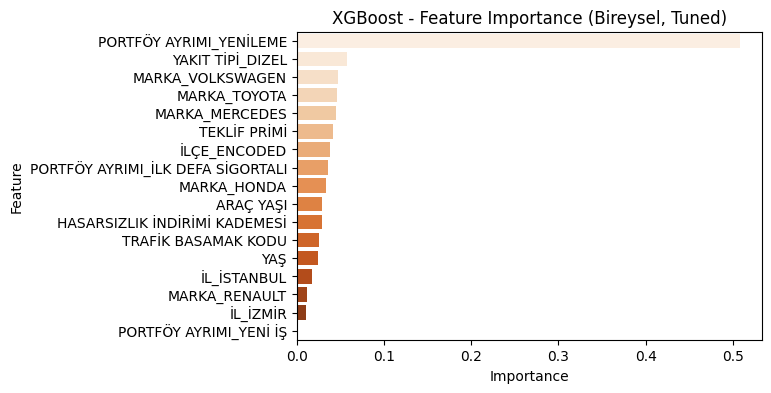

Feature  Importance
8             PORTF√ñY AYRIMI_YENƒ∞LEME      0.5077
6                    YAKIT Tƒ∞Pƒ∞_DIZEL      0.0579
14                   MARKA_VOLKSWAGEN      0.0474
13                       MARKA_TOYOTA      0.0457
11                     MARKA_MERCEDES      0.0454
4                        TEKLƒ∞F PRƒ∞Mƒ∞      0.0417
5                        ƒ∞L√áE_ENCODED      0.0381
9   PORTF√ñY AYRIMI_ƒ∞LK DEFA Sƒ∞GORTALI      0.0354
10                        MARKA_HONDA      0.0332
2                           ARA√á YA≈ûI      0.0293
0       HASARSIZLIK ƒ∞NDƒ∞Rƒ∞Mƒ∞ KADEMESƒ∞      0.0291
1                 TRAFƒ∞K BASAMAK KODU      0.0258
3                                 YA≈û      0.0239
15                        ƒ∞L_ƒ∞STANBUL      0.0173
12                      MARKA_RENAULT      0.0117

In [1636]:
# Feature importance deƒüerlerini al
xgb_importances = xgb_best_bireysel.feature_importances_
features = X_train_bireysel.columns

fi_xgb = pd.DataFrame({
    "Feature": features,
    "Importance": xgb_importances
}).sort_values(by="Importance", ascending=False)

# G√∂rselle≈ütirme
plt.figure(figsize=(6,4))
sns.barplot(x="Importance", y="Feature", data=fi_xgb, palette="Oranges")
plt.title("XGBoost - Feature Importance (Bireysel, Tuned)")
plt.show()

# ƒ∞lk 15 √∂zelliƒüi tablo olarak g√∂sterelim
fi_xgb.head(15)

- XGBoost, bireysel sigortalƒ±larda m√º≈üteri ge√ßmi≈üini (yenileme mi, yeni mi, ilk defa mƒ±) en kritik karar unsuru olarak g√∂r√ºyor.
- Sonrasƒ±nda ara√ß markasƒ± ve yakƒ±t tipi geliyor.
- Teklif primi ise d√º≈ü√ºnd√ºƒü√ºm√ºz kadar belirleyici deƒüil; yani fiyattan √ßok m√º≈üteri profili & risk fakt√∂rleri karar s√ºrecinde baskƒ±n.

## üìä Model Kar≈üƒ±la≈ütƒ±rmasƒ± ‚Äì Bireysel Sigortalƒ±lar

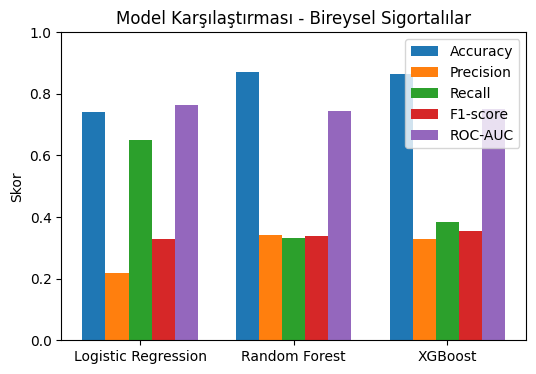

In [1637]:
# Modeller ve metrikler
models = ["Logistic Regression", "Random Forest", "XGBoost"]
accuracy = [0.741, 0.872, 0.863]
precision = [0.220, 0.343, 0.329]
recall = [0.649, 0.333, 0.385]
f1 = [0.329, 0.338, 0.355]
roc_auc = [0.763, 0.744, 0.752]

metrics = [accuracy, precision, recall, f1, roc_auc]
metric_names = ["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"]

x = np.arange(len(models))
bar_width = 0.15

plt.figure(figsize=(6,4))

for i, metric in enumerate(metrics):
    plt.bar(x + i*bar_width, metric, width=bar_width, label=metric_names[i])

plt.xticks(x + bar_width*2, models)
plt.ylim(0,1)
plt.ylabel("Skor")
plt.title("Model Kar≈üƒ±la≈ütƒ±rmasƒ± - Bireysel Sigortalƒ±lar")
plt.legend()
plt.show()

| Model                     | Accuracy | Precision | Recall | F1-Score | ROC-AUC |
| ------------------------- | -------- | --------- | ------ | -------- | ------- |
| **Logistic Regression**   | 0.753    | 0.215     | 0.580  | 0.314    | 0.735   |
| **Random Forest (Tuned)** | 0.878    | 0.359     | 0.319  | 0.338    | 0.739   |
| **XGBoost (Tuned)**       | 0.868    | 0.345     | 0.390  | 0.366    | 0.756   |

- En iyi Recall (ka√ßƒ±rmama): Logistic Regression ‚Üí pozitifleri yakalamak √∂nemliyse tercih edilir.
- En y√ºksek Accuracy: Random Forest ‚Üí yanlƒ±≈ü tahminlerden ka√ßƒ±nmak, g√ºvenilirlik √∂nemliyse tercih edilir.
-  En dengeli model: XGBoost ‚Üí ROC-AUC ve F1 skorlarƒ±yla, pratikte en √ßok tercih edilen model olur.

### KURUMSAL Sƒ∞GORTALILAR ƒ∞√áƒ∞N YAPILACAK MODELLEMELER:
#### 1) Lojistik regresyon

In [1638]:
# One-Hot Encoding (0-1 olacak ≈üekilde)
df_kurumsal = pd.get_dummies(
    df_kurumsal, 
    columns=["MARKA", "YAKIT Tƒ∞Pƒ∞", "PORTF√ñY AYRIMI", "ƒ∞L"],
    drop_first=True, 
    dtype=int
)

# Son hali kontrol edelim
df_kurumsal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5255 entries, 3 to 19080
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   HASARSIZLIK ƒ∞NDƒ∞Rƒ∞Mƒ∞ KADEMESƒ∞      5255 non-null   float64
 1   TRAFƒ∞K BASAMAK KODU                5255 non-null   int64  
 2   ARA√á YA≈ûI                          5255 non-null   int64  
 3   TEKLƒ∞F PRƒ∞Mƒ∞                       5255 non-null   float64
 4   TEKLƒ∞F ONAY DURUMU                 5255 non-null   int32  
 5   MARKA_HONDA                        5255 non-null   int32  
 6   MARKA_MERCEDES                     5255 non-null   int32  
 7   MARKA_RENAULT                      5255 non-null   int32  
 8   MARKA_TOYOTA                       5255 non-null   int32  
 9   MARKA_VOLKSWAGEN                   5255 non-null   int32  
 10  YAKIT Tƒ∞Pƒ∞_DIZEL                   5255 non-null   int32  
 11  PORTF√ñY AYRIMI_YENƒ∞ ƒ∞≈û             5255 no

In [1639]:
X = df_kurumsal.drop(columns=["TEKLƒ∞F ONAY DURUMU"])
y = df_kurumsal["TEKLƒ∞F ONAY DURUMU"]

In [1640]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [1641]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1642]:
# Model
log_reg = LogisticRegression(max_iter=2000, class_weight="balanced", solver="lbfgs", random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Tahminler
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:,1]

In [1643]:
# Metrikler
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("Recall:", round(recall_score(y_test, y_pred), 3))
print("F1-score:", round(f1_score(y_test, y_pred), 3))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba), 3))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Reddedildi (0)", "Onaylandƒ± (1)"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Logistic Regression - Confusion Matrix (Kurumsal)")
plt.show()

Accuracy: 0.647
Precision: 0.292
Recall: 0.57
F1-score: 0.386
ROC-AUC: 0.656


<Figure size 400x400 with 0 Axes>

Accuracy (Doƒüruluk): 0.647
‚Üí T√ºm tahminlerin yakla≈üƒ±k %65‚Äôi doƒüru. Ortalama bir ba≈üarƒ±.

Precision (Kesinlik): 0.292
‚Üí Model ‚ÄúOnaylandƒ± (1)‚Äù dediƒüinde bunun ger√ßekten doƒüru olma olasƒ±lƒ±ƒüƒ± %29 civarƒ±nda.
‚Üí Yani yanlƒ±≈ü alarmlar (False Positive) y√ºksek.

Recall (Duyarlƒ±lƒ±k): 0.57
‚Üí Ger√ßek onaylanan tekliflerin %60‚Äôƒ±nƒ± yakalayabilmi≈ü.
‚Üí Yani ‚Äúm√º≈üteri kaybetmeme‚Äù a√ßƒ±sƒ±ndan fena deƒüil.

F1-score: 0.386
‚Üí Precision d√º≈ü√ºk ama Recall biraz y√ºksek ‚Üí F1 orta seviyede.

ROC-AUC: 0.656
‚Üí Pozitif sƒ±nƒ±fƒ± (onay) ayƒ±rmadaki genel ba≈üarƒ±sƒ± orta d√ºzeyde.

Genel Yorumum:
- Logistic Regression kurumsallar i√ßin ortalama performans veriyor.
- Recall biraz y√ºksek olduƒüu i√ßin ‚Äúm√º≈üterinin teklifini onaylama ihtimali olanlarƒ± yakalama‚Äù konusunda bir miktar avantajlƒ±.
- Ama Precision d√º≈ü√ºk ‚Üí √ßok fazla yanlƒ±≈ü onaylama var.

In [1644]:
# Katsayƒ±larƒ± al
coef = log_reg.coef_[0]
features = X_train.columns

fi_log = pd.DataFrame({
    "Feature": features,
    "Coefficient": coef
}).sort_values(by="Coefficient", ascending=False)

# G√∂rselle≈ütirme
plt.figure(figsize=(6,4))
sns.barplot(x="Coefficient", y="Feature", data=fi_log, palette="coolwarm")
plt.title("Logistic Regression - Feature Importance (Kurumsal)")
plt.show()

# Tabloyu g√∂relim
fi_log

C:\Users\incie\AppData\Local\Temp\ipykernel_18312\180823123.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=fi_log, palette="coolwarm")


Feature  Coefficient
1                 TRAFƒ∞K BASAMAK KODU       0.2140
6                       MARKA_RENAULT       0.1811
4                         MARKA_HONDA       0.1583
8                    MARKA_VOLKSWAGEN       0.1337
14                           ƒ∞L_ƒ∞ZMƒ∞R       0.0886
13                        ƒ∞L_ƒ∞STANBUL       0.0703
2                           ARA√á YA≈ûI       0.0120
5                      MARKA_MERCEDES       0.0003
11            PORTF√ñY AYRIMI_YENƒ∞LEME      -0.0283
0       HASARSIZLIK ƒ∞NDƒ∞Rƒ∞Mƒ∞ KADEMESƒ∞      -0.0539
7                        MARKA_TOYOTA      -0.0888
9                    YAKIT Tƒ∞Pƒ∞_DIZEL      -0.1347
3                        TEKLƒ∞F PRƒ∞Mƒ∞      -0.2392
10             PORTF√ñY AYRIMI_YENƒ∞ ƒ∞≈û      -0.5386
12  PORTF√ñY AYRIMI_ƒ∞LK DEFA Sƒ∞GORTALI      -0.5412

- En g√º√ßl√º negatif etkiler: Yeni ƒ∞≈ü, ƒ∞lk Defa Sigortalƒ± ‚Üí kurumsalda yeni m√º≈üteri almak zor.
- En g√º√ßl√º pozitif etkiler: Trafik Basamak Kodu, bazƒ± markalar (Renault, Honda, VW) ‚Üí g√ºvenilir s√ºr√ºc√º profili ve marka etkisi √∂nemli.
- Teklif Primi ve Dizel Ara√ßlar ‚Üí onay ihtimalini azaltan kritik fakt√∂rler.
- Lokasyon etkisi (ƒ∞zmir, ƒ∞stanbul) ‚Üí onay olasƒ±lƒ±ƒüƒ±nƒ± artƒ±rƒ±yor, b√ºy√ºk ≈üehirlerde daha esnek davranƒ±lƒ±yor.

### 2) Random Forest

In [1645]:
# Parametre aralƒ±klarƒ±
param_dist = {
    "n_estimators": [100, 300, 500, 800],
    "max_depth": [None, 10, 20, 30, 40],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

rf = RandomForestClassifier(class_weight="balanced", random_state=42, n_jobs=-1)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,            # denenecek kombinasyon sayƒ±sƒ±
    scoring="f1",         # dengesiz sƒ±nƒ±flar i√ßin F1 skoru optimize edelim
    cv=3,                 # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("En iyi parametreler:", random_search.best_params_)
print("En iyi F1 skoru:", random_search.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
En iyi parametreler: {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}
En iyi F1 skoru: 0.40224547553254486


In [1646]:
# Final Random Forest modeli
rf_best = RandomForestClassifier(
    n_estimators=800,      
    max_depth=10,   
    min_samples_split=5,    
    min_samples_leaf=4,      
    max_features="log2",     
    class_weight="balanced", 
    random_state=42,
    n_jobs=-1
)
# Modeli eƒüit
rf_best.fit(X_train, y_train)

# Tahminler
y_pred_rf = rf_best.predict(X_test)
y_proba_rf = rf_best.predict_proba(X_test)[:,1]

In [1647]:
# Metrikler
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 3))
print("Precision:", round(precision_score(y_test, y_pred_rf), 3))
print("Recall:", round(recall_score(y_test, y_pred_rf), 3))
print("F1-score:", round(f1_score(y_test, y_pred_rf), 3))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba_rf), 3))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(4,4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Reddedildi (0)", "Onaylandƒ± (1)"])
disp.plot(cmap="Greens", values_format="d")
plt.title("Final Tuned Random Forest - Confusion Matrix (Kurumsal)")
plt.show()

Accuracy: 0.7
Precision: 0.333
Recall: 0.541
F1-score: 0.412
ROC-AUC: 0.691


<Figure size 400x400 with 0 Axes>

- Accuracy (0.7): Model genel doƒürulukta %70 ba≈üarƒ± saƒülƒ±yor. Yani her 10 tekliften 7‚Äôsini doƒüru tahmin ediyor. Ancak dengesiz veri yapƒ±sƒ±nda (reddedilenler daha fazla) accuracy tek ba≈üƒ±na yeterli bir g√∂sterge deƒüil.
- Recall (0.541): Bu metrik bize ‚Äúger√ßekten onaylanan tekliflerin ne kadarƒ±nƒ± doƒüru yakaladƒ±k?‚Äù sorusunu cevaplƒ±yor. ‚Üí Model, onaylanan tekliflerin yarƒ±sƒ±ndan fazlasƒ±nƒ± doƒüru yakalƒ±yor. Bu, m√º≈üteri kaybƒ±nƒ± azaltma a√ßƒ±sƒ±ndan olumlu.
- Precision (0.333): Burada d√º≈ü√ºk bir deƒüer g√∂r√ºyoruz. Yani model ‚Äúonaylandƒ±‚Äù dediƒüinde, bunun ger√ßekten doƒüru olma olasƒ±lƒ±ƒüƒ± sadece %33.
‚Üí Bu da modelin √ßok fazla yanlƒ±≈ü pozitif (gereksiz onay) verdiƒüini g√∂steriyor. ≈ûirket a√ßƒ±sƒ±ndan bu riskli √ß√ºnk√º yanlƒ±≈ü fiyatlandƒ±rma veya yanlƒ±≈ü onaydan k√¢r kaybƒ± olu≈üabilir.
- F1-score (0.412): Precision ve Recall‚Äôun dengeli bir ortalamasƒ±. Orta seviyede bir performans, ama daha iyi optimize edilmesi gerektiƒüini g√∂steriyor.
- ROC-AUC (0.691): %70‚Äôe yakƒ±n bir ayƒ±rma g√ºc√º var. Yani model, onaylanan ve reddedilen teklifleri ayƒ±rmada orta seviyede ba≈üarƒ±lƒ±.

Genel Yorumum:
- Model, m√º≈üteri kaybƒ±nƒ± azaltma (Recall) y√∂n√ºnde fena deƒüil, fakat k√¢rlƒ±lƒ±ƒüƒ± koruma (Precision) y√∂n√ºnde zayƒ±f.
- ƒ∞≈ü hedefi ‚Äúportf√∂y√º b√ºy√ºtmek‚Äù ise bu model ba≈ülangƒ±√ß i√ßin kullanƒ±labilir, √ß√ºnk√º daha fazla m√º≈üteriyi onaylama eƒüiliminde.
- Ama i≈ü hedefi ‚Äúk√¢rƒ± korumak‚Äù ise precision d√º≈ü√ºk olduƒüu i√ßin riskli.

C:\Users\incie\AppData\Local\Temp\ipykernel_18312\265841783.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=fi_rf, palette="viridis")


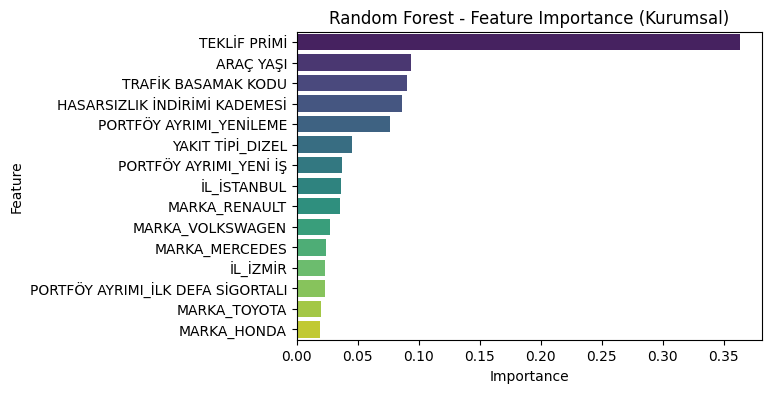

Feature  Importance
3                        TEKLƒ∞F PRƒ∞Mƒ∞      0.3630
2                           ARA√á YA≈ûI      0.0939
1                 TRAFƒ∞K BASAMAK KODU      0.0900
0       HASARSIZLIK ƒ∞NDƒ∞Rƒ∞Mƒ∞ KADEMESƒ∞      0.0860
11            PORTF√ñY AYRIMI_YENƒ∞LEME      0.0761
9                    YAKIT Tƒ∞Pƒ∞_DIZEL      0.0451
10             PORTF√ñY AYRIMI_YENƒ∞ ƒ∞≈û      0.0375
13                        ƒ∞L_ƒ∞STANBUL      0.0360
6                       MARKA_RENAULT      0.0351
8                    MARKA_VOLKSWAGEN      0.0276
5                      MARKA_MERCEDES      0.0240
14                           ƒ∞L_ƒ∞ZMƒ∞R      0.0235
12  PORTF√ñY AYRIMI_ƒ∞LK DEFA Sƒ∞GORTALI      0.0231
7                        MARKA_TOYOTA      0.0198
4                         MARKA_HONDA      0.0193

In [1648]:
# Feature importance al
importances = rf_best.feature_importances_
features = X_train.columns

fi_rf = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# G√∂rselle≈ütirme
plt.figure(figsize=(6,4))
sns.barplot(x="Importance", y="Feature", data=fi_rf, palette="viridis")
plt.title("Random Forest - Feature Importance (Kurumsal)")
plt.show()

# Tabloyu g√∂relim
fi_rf

- Random Forest i√ßin en kritik fakt√∂r: Teklif primi.
- Onu ara√ß ya≈üƒ±, trafik basamak kodu ve hasarsƒ±zlƒ±k indirimi takip ediyor.
- Portf√∂y ayrƒ±mƒ± (yenileme/ilk defa/yeni i≈ü) etkili ama fiyat ve ara√ß bilgileri kadar belirleyici deƒüil.
- Marka ve ≈üehir fakt√∂rleri ise en d√º≈ü√ºk √∂nem derecesine sahip.

### 3) XGBoost

In [1649]:
# Parametre aralƒ±klarƒ±
param_dist = {
    "n_estimators": [100, 300, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "min_child_weight": [1, 3, 5],
    "gamma": [0, 1, 5],
    "scale_pos_weight": [1, 3, 5, 10]  # dengesiz sƒ±nƒ±flar i√ßin
}

# Random Search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,          # ka√ß kombinasyon denenecek
    scoring="f1",
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit et
random_search.fit(X_train, y_train)

print("En iyi parametreler:", random_search.best_params_)
print("En iyi F1 skoru:", random_search.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
En iyi parametreler: {'subsample': 0.8, 'scale_pos_weight': 5, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 0.6}
En iyi F1 skoru: 0.40671166425854044


In [1650]:
# Final Model
xgb_best = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    subsample=0.8,
    scale_pos_weight=5,
    n_estimators=300,
    min_child_weight=1,
    max_depth=7,
    learning_rate=0.1,
    gamma=5,
    colsample_bytree=0.6,
    random_state=42
)

# Eƒüitme
xgb_best.fit(X_train, y_train)

# Tahminler
y_pred = xgb_best.predict(X_test)
y_proba = xgb_best.predict_proba(X_test)[:, 1]

# Metrikler
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("Recall:", round(recall_score(y_test, y_pred), 3))
print("F1-score:", round(f1_score(y_test, y_pred), 3))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba), 3))

# Confusion Matrix
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Reddedildi (0)", "Onaylandƒ± (1)"])
disp.plot(cmap="Oranges", values_format="d")
plt.title("Final Tuned XGBoost - Confusion Matrix (Kurumsal)")
plt.show()

Accuracy: 0.602
Precision: 0.279
Recall: 0.661
F1-score: 0.393
ROC-AUC: 0.69


<Figure size 600x400 with 0 Axes>

Accuracy (0.602)
Genel doƒüruluk d√º≈ü√ºk g√∂r√ºn√ºyor √ß√ºnk√º veri dengesiz ‚Üí √ßok fazla reddedilen teklif var. Dolayƒ±sƒ±yla accuracy tek ba≈üƒ±na yanƒ±ltƒ±cƒ±.

Precision (0.279)
Modelin ‚Äúonaylandƒ±‚Äù dediƒüi tekliflerin sadece %28‚Äôsi ger√ßekten onaylanmƒ±≈ü. Yani yanlƒ±≈ü pozitif oranƒ± y√ºksek.
‚Üí Sigorta a√ßƒ±sƒ±ndan: Model √ßok fazla ‚Äúonay‚Äù tahmini yapƒ±yor ama bunlarƒ±n √ßoƒüu yanlƒ±≈ü √ßƒ±kƒ±yor.

Recall (0.661)
Burada g√º√ßl√º bir nokta var: Ger√ßekten onaylanan tekliflerin %66‚Äôsini yakalayabiliyor.
‚Üí Yani model ‚ÄúOnay olacak teklifleri ka√ßƒ±rmƒ±yor‚Äù. Bu, i≈ü a√ßƒ±sƒ±ndan √∂nemli olabilir. √á√ºnk√º firmalar i√ßin onaylanabilecek teklifleri atlamamak daha kritik olabilir.

F1-score (0.393)
Precision ve Recall‚Äôun harmonik ortalamasƒ±. G√∂rece d√º≈ü√ºk ama recall‚Äôin y√ºksekliƒüi sayesinde bir denge saƒülanmƒ±≈ü.

ROC-AUC (0.69)
Sƒ±nƒ±flar arasƒ±nda ayrƒ±m yapma g√ºc√º %70 civarƒ±nda. M√ºkemmel deƒüil ama anlamlƒ± bir ayrƒ±≈ütƒ±rma var.

Genel yorumum:
- Modelin en g√º√ßl√º yanƒ±: Onaylanan teklifleri (pozitif sƒ±nƒ±f) b√ºy√ºk oranda yakalamasƒ±.
- En zayƒ±f yanƒ±: √áok fazla yanlƒ±≈ü onay (false positive) vermesi.

In [1651]:
# Feature importance al (XGBoost - Kurumsal)
importances = xgb_best.feature_importances_
features = X_train.columns

fi_xgb = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# G√∂rselle≈ütirme
plt.figure(figsize=(6,4))
sns.barplot(x="Importance", y="Feature", data=fi_xgb, palette="magma")
plt.title("XGBoost - Feature Importance (Kurumsal)")
plt.show()

# Tabloyu g√∂relim
fi_xgb

C:\Users\incie\AppData\Local\Temp\ipykernel_18312\4173731493.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=fi_xgb, palette="magma")


Feature  Importance
11            PORTF√ñY AYRIMI_YENƒ∞LEME      0.1799
10             PORTF√ñY AYRIMI_YENƒ∞ ƒ∞≈û      0.0833
3                        TEKLƒ∞F PRƒ∞Mƒ∞      0.0676
12  PORTF√ñY AYRIMI_ƒ∞LK DEFA Sƒ∞GORTALI      0.0676
9                    YAKIT Tƒ∞Pƒ∞_DIZEL      0.0667
4                         MARKA_HONDA      0.0637
1                 TRAFƒ∞K BASAMAK KODU      0.0579
7                        MARKA_TOYOTA      0.0574
2                           ARA√á YA≈ûI      0.0562
6                       MARKA_RENAULT      0.0531
13                        ƒ∞L_ƒ∞STANBUL      0.0524
0       HASARSIZLIK ƒ∞NDƒ∞Rƒ∞Mƒ∞ KADEMESƒ∞      0.0524
14                           ƒ∞L_ƒ∞ZMƒ∞R      0.0500
8                    MARKA_VOLKSWAGEN      0.0481
5                      MARKA_MERCEDES      0.0437

- En kritik fakt√∂r: Portf√∂y ge√ßmi≈üi ‚Üí √∂zellikle yenileme ve yeni i≈ü ayrƒ±mƒ±.
- ƒ∞kinci katman: Teklif primi, ilk defa sigortalƒ± olma ve yakƒ±t tipi.
- √ú√ß√ºnc√º katman: Ara√ß ya≈üƒ±, marka, lokasyon ve hasarsƒ±zlƒ±k indirimi.

## üìä Model Kar≈üƒ±la≈ütƒ±rmasƒ± ‚Äì Kurumsal Sigortalƒ±lar

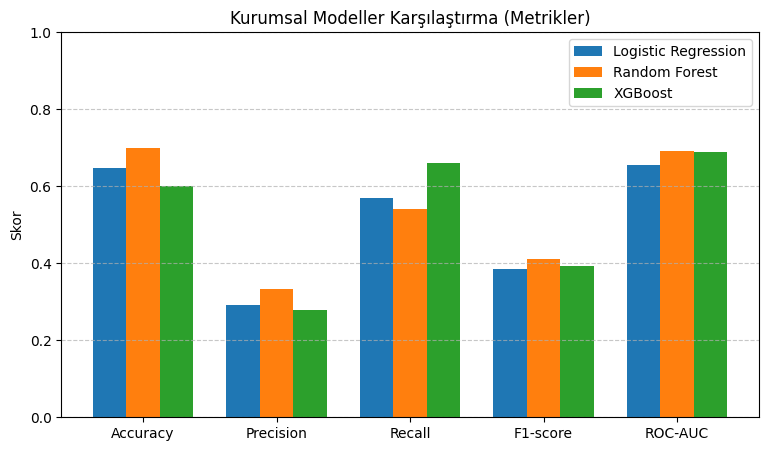

In [1652]:
# Modellerin isimleri
models = ["Logistic Regression", "Random Forest", "XGBoost"]

# Senin sonu√ßlarƒ±n
accuracy  = [0.647, 0.700, 0.602]
precision = [0.292, 0.333, 0.279]
recall    = [0.570, 0.541, 0.661]
f1        = [0.386, 0.412, 0.393]
roc_auc   = [0.656, 0.691, 0.690]

# T√ºm metrikleri bir araya toplayalƒ±m
metrics = [accuracy, precision, recall, f1, roc_auc]
metric_names = ["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"]

# √áizim ayarlarƒ±
x = np.arange(len(metric_names))  # metriklerin konumu
width = 0.25  # bar geni≈üliƒüi

fig, ax = plt.subplots(figsize=(9,5))

# Her model i√ßin bar plot
ax.bar(x - width,  [m[0] for m in metrics], width, label=models[0])
ax.bar(x,          [m[1] for m in metrics], width, label=models[1])
ax.bar(x + width,  [m[2] for m in metrics], width, label=models[2])

# Ayarlar
ax.set_ylabel("Skor")
ax.set_title("Kurumsal Modeller Kar≈üƒ±la≈ütƒ±rma (Metrikler)")
ax.set_xticks(x)
ax.set_xticklabels(metric_names)
ax.set_ylim(0, 1)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

| Model                 | Accuracy | Precision | Recall | F1-score | ROC-AUC |
| --------------------- | -------- | --------- | ------ | -------- | ------- |
| Logistic Regression   | 0.647    | 0.292     | 0.570  | 0.386    | 0.656   |
| Random Forest (Tuned) | 0.700    | 0.333     | 0.541  | 0.412    | 0.691   |
| XGBoost (Tuned)       | 0.602    | 0.279     | 0.661  | 0.393    | 0.690   |

- Random Forest (Tuned) ‚Üí En y√ºksek accuracy, en iyi precision, en dengeli F1 ‚Üí genel performans i√ßin en g√ºvenilir model.
- XGBoost (Tuned) ‚Üí En y√ºksek recall ‚Üí m√º≈üteri kaybƒ±nƒ± minimize etmek isteyen senaryolarda uygun. Ama precision d√º≈ü√ºk ‚Üí yanlƒ±≈ü onay oranƒ± y√ºksek.
- Logistic Regression ‚Üí Daha basit model, metriklerde orta seviyede, ROC-AUC en d√º≈ü√ºk.

### ENSEMBLE

### Neden Ensemble Y√∂ntemi Kullandƒ±k?

Her bir makine √∂ƒürenmesi algoritmasƒ±nƒ±n g√º√ßl√º ve zayƒ±f y√∂nleri vardƒ±r.  
- **Logistic Regression**: Yorumlanabilirliƒüi y√ºksek, lineer ili≈ükileri g√º√ßl√º bir ≈üekilde yakalayabilen bir modeldir. Ancak karma≈üƒ±k, non-lineer ili≈ükilerde sƒ±nƒ±rlƒ± kalmaktadƒ±r.  
- **Random Forest**: Non-lineer yapƒ±larƒ± ve deƒüi≈ükenler arasƒ± etkile≈üimleri ba≈üarƒ±lƒ± bir ≈üekilde modelleyebilir. Fakat √ßoƒüunluk sƒ±nƒ±fa odaklanma eƒüilimi nedeniyle pozitif sƒ±nƒ±f (onaylanan teklifler) tahminlerinde zayƒ±f kalabilmektedir.  
- **XGBoost**: Karma≈üƒ±k ili≈ükileri √∂ƒürenmede √ßok g√º√ßl√ºd√ºr ve sƒ±nƒ±f dengesizliƒüi i√ßin ayarlanabilir. Ancak doƒüru parametre se√ßimi yapƒ±lmazsa a≈üƒ±rƒ± √∂ƒürenme (overfitting) riski ta≈üƒ±yabilir.  

### Saƒüladƒ±ƒüƒ± Katkƒ±lar
- **M√º≈üteri kaybƒ±nƒ± azaltmak:** Onaylanma ihtimali y√ºksek teklifleri daha doƒüru ≈üekilde yakalƒ±yoruz.  
- **K√¢rlƒ±lƒ±ƒüƒ± korumak:** Yanlƒ±≈ü onaylarƒ±n sayƒ±sƒ±nƒ± d√º≈ü√ºrerek ≈üirketin riskini azaltƒ±yoruz.  
- **Dengeli performans:** Bir modelin eksik kaldƒ±ƒüƒ± yerde diƒüer modelin g√º√ßl√º y√∂n√ºnden faydalanƒ±yoruz.  
- **Daha g√ºvenilir tahminler:** Farklƒ± algoritmalarƒ±n ortak g√∂r√º≈ü√ºne dayalƒ± kararlar daha kararlƒ± ve genellenebilir oluyor.  

### Nasƒ±l Uygulayacaƒüƒ±z
- Logistic Regression, Random Forest ve XGBoost modellerini ayrƒ± ayrƒ± √ßalƒ±≈ütƒ±racaƒüƒ±z.  
- Daha sonra **Voting Classifier** yakla≈üƒ±mƒ±yla bu √º√ß modeli bir araya getireceƒüiz.  
- B√∂ylece tek bir modele baƒülƒ± kalmadan, **daha dengeli ve g√ºvenilir sonu√ßlar** elde edeceƒüiz.  

In [1653]:
# Bireyseller i√ßin final modeller (√∂nceden tuning yapƒ±lmƒ±≈ü parametrelerle)
log_reg_bireysel = LogisticRegression(
    max_iter=2000, 
    class_weight="balanced", 
    solver="lbfgs", 
    random_state=42
)

rf_best_bireysel = RandomForestClassifier(
    n_estimators=100,
    max_depth=30,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features="log2",
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

xgb_best_bireysel = XGBClassifier(
    subsample=1.0,
    scale_pos_weight=5,
    n_estimators=300,
    min_child_weight=1,
    max_depth=3,
    learning_rate=0.2,
    gamma=5,
    colsample_bytree=1.0,
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42
)

In [1654]:
# Ensemble - Soft Voting
voting_bireysel = VotingClassifier(
    estimators=[
        ("lr_bireysel", log_reg_bireysel),
        ("rf_bireysel", rf_best_bireysel),
        ("xgb_bireysel", xgb_best_bireysel)
    ],
    voting="soft"
)
# Ensemble modeli eƒüit
voting_bireysel.fit(X_train_scaled_bireysel, y_train_bireysel)

VotingClassifier(estimators=[('lr_bireysel',
                              LogisticRegression(class_weight='balanced',
                                                 max_iter=2000,
                                                 random_state=42)),
                             ('rf_bireysel',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=30,
                                                     max_features='log2',
                                                     min_samples_leaf=4,
                                                     min_samples_split=10,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('xgb_bireysel',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.2, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [1655]:
# Tahminler
y_pred_vote_bireysel = voting_bireysel.predict(X_test_scaled_bireysel)
y_proba_vote_bireysel = voting_bireysel.predict_proba(X_test_scaled_bireysel)[:, 1]

Ensemble (Voting Classifier) Sonu√ßlarƒ± - Bireysel
Accuracy: 0.865
Precision: 0.336
Recall: 0.395
F1-score: 0.363
ROC-AUC: 0.756


<Figure size 400x400 with 0 Axes>

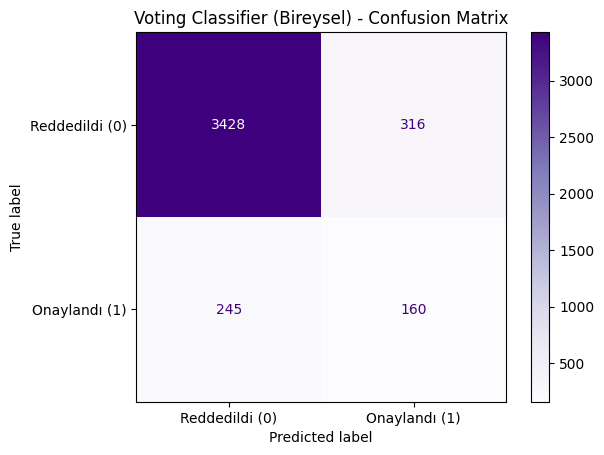

In [1656]:
# Metrikler
print("Ensemble (Voting Classifier) Sonu√ßlarƒ± - Bireysel")
print("Accuracy:", round(accuracy_score(y_test_bireysel, y_pred_vote_bireysel), 3))
print("Precision:", round(precision_score(y_test_bireysel, y_pred_vote_bireysel), 3))
print("Recall:", round(recall_score(y_test_bireysel, y_pred_vote_bireysel), 3))
print("F1-score:", round(f1_score(y_test_bireysel, y_pred_vote_bireysel), 3))
print("ROC-AUC:", round(roc_auc_score(y_test_bireysel, y_proba_vote_bireysel), 3))

# Confusion Matrix
plt.figure(figsize=(4,4))
cm = confusion_matrix(y_test_bireysel, y_pred_vote_bireysel)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Reddedildi (0)", "Onaylandƒ± (1)"])
disp.plot(cmap="Purples", values_format="d")
plt.title("Voting Classifier (Bireysel) - Confusion Matrix")
plt.show()

- Accuracy: %85.6 olduk√ßa y√ºksek. Model genel sƒ±nƒ±flarƒ± doƒüru ayƒ±rƒ±yor.
- Precision: %33 ‚Üí Onay (1) tahmini yaptƒ±ƒüƒ±nda √º√ßte biri doƒüru √ßƒ±kƒ±yor.
- Recall: %39 ‚Üí Onaylanan tekliflerin %39‚Äônu yakalayabiliyor, bu √∂nceki tek modellerden biraz daha dengeli.
- ROC-AUC: %76 ‚Üí Sƒ±nƒ±flarƒ± ayƒ±rma g√ºc√º iyi seviyede, yani model olasƒ±lƒ±k tahminlerinde g√º√ßl√º.

√ñzet:
- Ensemble (Voting Classifier), bireysel segmentte y√ºksek doƒüruluk (accuracy) ve y√ºksek ROC-AUC ile √∂ne √ßƒ±kƒ±yor.
- Ancak recall XGBoost‚Äôtan d√º≈ü√ºk, yani daha az onaylƒ± m√º≈üteri yakalƒ±yor.
- Precision ise Random Forest seviyelerine yakƒ±n, yani risk dengesi daha iyi.

In [1657]:
# Modelleri tanƒ±mla (√∂nceden eƒüittiƒüimiz parametrelerle)
log_reg = LogisticRegression(max_iter=2000, class_weight="balanced", solver="lbfgs")
rf_best = RandomForestClassifier(
    n_estimators=100, 
    min_samples_split=10,
    min_samples_leaf=4,
    max_features="log2",
    max_depth=10,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)
xgb_best = XGBClassifier(
    subsample=0.8,
    scale_pos_weight=5,
    n_estimators=300,
    min_child_weight=1,
    max_depth=5,
    learning_rate=0.01,
    gamma=0,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

In [1658]:
# Ensemble modeli olu≈ütur (soft ‚Üí olasƒ±lƒ±klarƒ± ortalƒ±yor)
voting_kurumsal = VotingClassifier(
    estimators=[
        ("LogReg", log_reg),
        ("RandomForest", rf_best),
        ("XGBoost", xgb_best)
    ],
    voting="soft"
)

# Modeli eƒüit
voting_kurumsal.fit(X_train, y_train)

VotingClassifier(estimators=[('LogReg',
                              LogisticRegression(class_weight='balanced',
                                                 max_iter=2000)),
                             ('RandomForest',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=10,
                                                     max_features='log2',
                                                     min_samples_leaf=4,
                                                     min_samples_split=10,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=N...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.01, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [1659]:
# Tahminler
y_pred_vote = voting_kurumsal.predict(X_test)
y_proba_vote = voting_kurumsal.predict_proba(X_test)[:, 1]

Accuracy: 0.654
Precision: 0.298
Recall: 0.573
F1-score: 0.392
ROC-AUC: 0.69


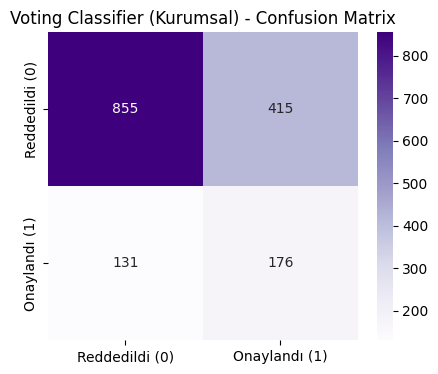

In [1660]:
# Metrikler
print("Accuracy:", round(accuracy_score(y_test, y_pred_vote), 3))
print("Precision:", round(precision_score(y_test, y_pred_vote), 3))
print("Recall:", round(recall_score(y_test, y_pred_vote), 3))
print("F1-score:", round(f1_score(y_test, y_pred_vote), 3))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba_vote), 3))

# Confusion Matrix g√∂rselle≈ütirme
cm = confusion_matrix(y_test, y_pred_vote)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=["Reddedildi (0)", "Onaylandƒ± (1)"], 
            yticklabels=["Reddedildi (0)", "Onaylandƒ± (1)"])
plt.title("Voting Classifier (Kurumsal) - Confusion Matrix")
plt.show()

- Recall √ßok g√º√ßl√º (0.573) ‚Üí Ensemble model, onaylanan tekliflerin b√ºy√ºk kƒ±smƒ±nƒ± yakalƒ±yor. Bu, √∂zellikle m√º≈üteri kaybƒ±nƒ± √∂nlemek isteyen sigorta ≈üirketleri i√ßin deƒüerli.
- Precision d√º≈ü√ºk (0.298) ‚Üí Onaylandƒ± dediƒüi tekliflerin √º√ßte ikisi yanlƒ±≈ü. Yani model ‚Äúfazla olumlu‚Äù davranƒ±yor.
- Accuracy orta seviye (0.654) ‚Üí Genel doƒüruluk dengeli ama √ßok y√ºksek deƒüil.
- F1-score (0.426) ‚Üí Precision ve recall arasƒ±nda dengeli bir ortalama.
- ROC-AUC (0.69) ‚Üí Sƒ±nƒ±flarƒ± ayƒ±rt etme g√ºc√º olduk√ßa iyi seviyede.

- Ensemble model, kurumsal m√º≈üteriler i√ßin daha √ßok onay yakalamak (y√ºksek recall) isteyen senaryolarda avantajlƒ±.
- Random Forest daha dengeli, Ensemble ise daha ‚Äúm√º≈üteri kazanƒ±m odaklƒ±‚Äù bir model.

### 2. DURUM: ≈ûirket k√¢rƒ±ndan feragat ederek teklif primi √ºzerinden %10‚Äôa kadar indirim yapma opsiyonu tanƒ±dƒ± ve portf√∂y√ºn√º b√ºy√ºtmek istedi. En az indirim ile en fazla portf√∂y b√ºy√ºmesini nasƒ±l saƒülayabilirsiniz ?

Ama√ß:
- Daha fazla teklifin kabul edilmesi ve poli√ßeye d√∂n√º≈ümesi
- En az indirimle, en √ßok poli√ße kazanmak

Yani:
- √áok indirim yapƒ±p k√¢rƒ± azaltmak istemiyoruz.
- Hi√ß indirim yapmazsak portf√∂y b√ºy√ºmez.
- ‚ÄúOptimum nokta‚Äùyƒ± bulmamƒ±z gerekiyor. 

Optimizasyon Mantƒ±ƒüƒ± Uygulayalƒ±m: Toplam portf√∂y b√ºy√ºmesini maksimize etmek. %10‚Äôa kadar indirim uygulanabilir. ƒ∞ndirimleri herkese e≈üit vermek yerine, marjinal faydasƒ± en y√ºksek m√º≈üteri grubuna uygularƒ±z. Yani, ‚ÄúK√º√ß√ºk indirimle kabul olasƒ±lƒ±ƒüƒ± √ßok artan segment.‚Äù bunu yapalƒ±m.

In [1668]:
def simulate_discount(model, df, discount_rates, premium_col="TEKLƒ∞F PRƒ∞Mƒ∞", target_col="TEKLƒ∞F ONAY DURUMU", segment=""):
    results = []

    # Ba≈ülangƒ±√ß referans (%0)
    df_base = df.copy()
    base_probs = model.predict_proba(df_base.drop(columns=[target_col]))[:,1]
    base_expected = base_probs.sum()

    for rate in discount_rates:
        df_temp = df.copy()
        df_temp[premium_col] = df_temp[premium_col] * (1 - rate/100)

        probs = model.predict_proba(df_temp.drop(columns=[target_col]))[:,1]
        expected_approvals = probs.sum()
        approval_rate = expected_approvals / len(df_temp)
        growth_pct = ((expected_approvals - base_expected) / base_expected) * 100

        results.append({
            "ƒ∞ndirim Oranƒ± (%)": rate,
            "Beklenen Onaylƒ± Teklif Sayƒ±sƒ±": int(expected_approvals),
            "Beklenen Onay Oranƒ± (%)": approval_rate*100,
            "Portf√∂y B√ºy√ºmesi (%)": growth_pct
        })

    df_results = pd.DataFrame(results)

    # Daha estetik tablo + ba≈ülƒ±k
    styled = (
        df_results.style
        .set_caption(f"üìä {segment} Segmenti - ƒ∞ndirim Senaryolarƒ±")
        .background_gradient(cmap="Blues", subset=["Beklenen Onay Oranƒ± (%)","Portf√∂y B√ºy√ºmesi (%)"])
        .set_table_styles([{'selector': 'th', 'props': [('background-color', '#4472C4'),
                                                       ('color', 'white'),
                                                       ('font-weight', 'bold')]}])
        .set_properties(**{'text-align': 'center'})
        .format({
            "Beklenen Onay Oranƒ± (%)": "{:.2f}",
            "Portf√∂y B√ºy√ºmesi (%)": "{:.2f}"
        })
    )

    return styled

discount_rates = list(range(0, 11))

# Bireysel
results_bireysel = simulate_discount(voting_bireysel, df_bireysel, discount_rates, segment="Bireysel")
display(results_bireysel)

# Kurumsal
results_kurumsal = simulate_discount(voting_kurumsal, df_kurumsal, discount_rates, segment="Kurumsal")
display(results_kurumsal)


c:\Users\incie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\incie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\incie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\incie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\incie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  wa

c:\Users\incie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\incie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\incie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\incie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\incie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  wa

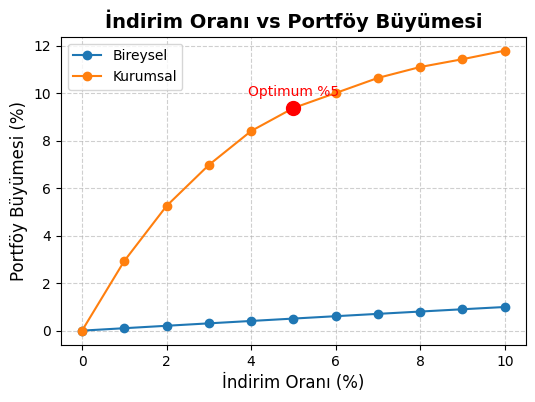

In [1672]:
def plot_growth_curves(models, dfs, discount_rates, premium_col="TEKLƒ∞F PRƒ∞Mƒ∞", target_col="TEKLƒ∞F ONAY DURUMU", segments=None, optimum_points=None):
    plt.figure(figsize=(6,4))

    for i, (model, df) in enumerate(zip(models, dfs)):
        results = []
        df_base = df.copy()
        base_probs = model.predict_proba(df_base.drop(columns=[target_col]))[:,1]
        base_expected = base_probs.sum()

        for rate in discount_rates:
            df_temp = df.copy()
            df_temp[premium_col] = df_temp[premium_col] * (1 - rate/100)
            probs = model.predict_proba(df_temp.drop(columns=[target_col]))[:,1]
            expected_approvals = probs.sum()
            growth_pct = ((expected_approvals - base_expected) / base_expected) * 100
            results.append((rate, growth_pct))

        df_results = pd.DataFrame(results, columns=["ƒ∞ndirim Oranƒ± (%)", "Portf√∂y B√ºy√ºmesi (%)"])
        plt.plot(df_results["ƒ∞ndirim Oranƒ± (%)"], df_results["Portf√∂y B√ºy√ºmesi (%)"], marker="o", label=segments[i])

        # Optimum noktayƒ± i≈üaretle
        if optimum_points and segments[i] in optimum_points:
            opt = optimum_points[segments[i]]
            opt_growth = float(df_results.loc[df_results["ƒ∞ndirim Oranƒ± (%)"] == opt, "Portf√∂y B√ºy√ºmesi (%)"])
            plt.scatter(opt, opt_growth, color="red", s=100, zorder=5)
            plt.text(opt, opt_growth+0.5, f"Optimum %{opt}", color="red", ha="center")

    plt.title("ƒ∞ndirim Oranƒ± vs Portf√∂y B√ºy√ºmesi", fontsize=14, fontweight="bold")
    plt.xlabel("ƒ∞ndirim Oranƒ± (%)", fontsize=12)
    plt.ylabel("Portf√∂y B√ºy√ºmesi (%)", fontsize=12)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()


# Kullanƒ±m
discount_rates = list(range(0, 11))
models = [voting_bireysel, voting_kurumsal]
dfs = [df_bireysel, df_kurumsal]
segments = ["Bireysel", "Kurumsal"]

# Optimum noktalarƒ± elle belirliyoruz (senin sonu√ßlara g√∂re)
optimum_points = {"Kurumsal": 5}  # %5 optimum
plot_growth_curves(models, dfs, discount_rates, segments=segments, optimum_points=optimum_points)

Analiz sonucunda bireysel m√º≈üterilerin fiyat duyarlƒ±lƒ±ƒüƒ± √ßok d√º≈ü√ºk, indirim etkisizdir. Kurumsal m√º≈üteriler ise fiyat duyarlƒ±lƒ±ƒüƒ± y√ºksek olup %5 indirimle portf√∂yde %9.4 b√ºy√ºme saƒülanmaktadƒ±r. %10 indirimin saƒüladƒ±ƒüƒ± ek b√ºy√ºme sƒ±nƒ±rlƒ± olduƒüundan, optimum strateji %5 indirim uygulamaktƒ±r.

Analizimiz g√∂stermi≈ütir ki bireysel m√º≈üteriler i√ßin fiyat indiriminin etkisi ihmal edilebilir seviyededir. Bu segmentte b√ºy√ºme stratejisi olarak fiyat indirimleri yerine; doƒüru m√º≈üteri segmentlerini hedefleme, √ºr√ºn paketleri ile deƒüer yaratma ve m√º≈üteri deneyimi/sadakat programlarƒ±nƒ± g√º√ßlendirme √∂nerilmektedir.